## Добрый день. В этом ноутбуке я провел EDA для датасета с транзакциями. 

- В текущем ноутбуке есть все промежуточные `выводы` и `графики`. Но я бы `советовал` смотреть лишь `графики`, а также `Основные выводы и метрики` (блок сразу под этим блоком).

- Дополнительно описан файл `Summary.md`, он выглядит более структурированно и красиво (спасибо Claude-4-Sonnet).
- В конце файла `Summary.md` имеется блок `🎯 Ключевые выводы для бизнеса` - советую почитать их.
- Также я заметил, что часто мошенническая доля составляла именно `20%` в разных разрезах и аггрегациях, возможно тут тоже лежит какой-то инсайт, но я не знаю как его использовать. Нужен брейншторм.


## Основные выводы и метрики:
1. Процентное соотношение 80:20 (легитимные:мошеннические операции)

2. Самые "мошеннические" часы: с 0:00 до 6:00. 60% транзакций в этом диапазоне мошеннические

3. Доля мошеннических операций по дням: 20% по каждому дню недели

4. 90% транзакций происходят через браузеры и телефоны

5. 100% мошеннических операций на устройствах: Chip Reader, NFC Payment, Magnetic Stripe

6. Общий ущерб от мошенничества: $1,307,291,327
7. Самый популярный канал: web (61.0% транзакций - 4,563,141 транзакций)
8. Самый рискованный канал: pos (100.00% мошенничества - 651,047 транзакций)
9. Топ стран по мошенническим операциям: 
- Nigeria , Brazil , Russia ,  Mexico 
- 35-38% мошеннических операций 
- общая доля транзакций - 40%

10. Мошенничество в домашней стране: 2.49%

11. Мошенничество в зарубежных операциях: 56.78%
12. Количество мошеннических операций по категориям (vendor_category): в каждой категории 20% операций - мошеннических
13. Количество мошеннических операций по типам (vendor_type): в каждом типе 20% операций - мошеннических
14. Количество мошеннических операций по типам продавца (is_high_risk): в каждом типе 20% операций - мошеннических
15. По всем продавцам (vendor) доля мошенничества 20%

16. Средние и медианные суммы транзакций: $359.26 и $542.63 соответственно. 
- 25-й процентиль: $168.63
- 75-й процентиль: $615.52
17. РАСПРЕДЕЛЕНИЕ ПО ДИАПАЗОНАМ СУММ:

| Диапазон | Транзакции | Процент |
|----------|------------|---------|
| $0-50 | 657,206 | 8.78% |
| $50-100 | 502,080 | 6.71% |
| $100-500 | 3,977,225 | 53.14% |
| $500-1K | 1,278,947 | 17.09% |
| $1K-5K | 1,041,662 | 13.92% |
| $5K+ | 26,646 | 0.36% |

18. Наибольшая средняя сумма: Platinum Credit ($928.23)

19. Наименьшая средняя сумма: Basic Debit ($339.70)

20. МОШЕННИЧЕСТВО ПО ДИАПАЗОНАМ СУММ:

| Диапазон | Транзакции | Мошеннические | Процент мошенничества |
|----------|------------|---------------|----------------------|
| $0-50 | 657,206 | 477,103 | **72.60%** |
| $50-100 | 502,080 | 41,087 | 8.18% |
| $100-500 | 3,977,225 | 264,748 | 6.66% |
| $500-1K | 1,278,947 | 229,003 | 17.91% |
| $1K-5K | 1,041,662 | 456,132 | **43.79%** |
| $5K+ | 26,646 | 26,646 | **100.00%** |

21. Больше всего доли мошеннических операций в диапазоне $0-50 и $1к-5к - 72% и 43% соответственно. В диапазоне свыше $5к - все операции мошеннические.

22. Процент Мошенничества при высокой активности транзакций (в час): 20.29%

23. Доля одноразовых устройств: 42%
24. Уровень мошенничества на одноразовых устройствах: 100%
25. Пиковый час активности транзакций: 18:00 (456,393.0 транзакций)
26. Статистика мошенничества по дням:
- Средняя дневная доля мошенничества: 19.97%
- Максимальная дневная доля: 20.18%
- Минимальная дневная доля: 19.75%


In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [6]:
df_transactions_optimized = pd.read_parquet('transactions_usd_optimized.parquet')
df_transactions_optimized.head()

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,country,city,city_size,card_type,is_card_present,device,channel,device_fingerprint,ip_address,is_outside_home_country,is_high_risk_vendor,is_weekend,is_fraud,num_transactions,total_amount,unique_merchants,unique_countries,max_single_amount
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,394.658011,UK,Unknown City,medium,Platinum Credit,False,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,False,False,False,False,1197,4.483492e+07,105,12,2.577089e+06
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,619.905757,Brazil,Unknown City,medium,Platinum Credit,False,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,True,True,False,True,509,3.701207e+06,100,12,9.474609e+05
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,719.506409,Japan,Unknown City,medium,Platinum Credit,False,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,False,False,False,False,332,2.746928e+05,97,12,1.299151e+04
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,436.808287,Australia,Unknown City,medium,Premium Debit,False,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,False,False,False,False,764,1.524784e+07,105,12,1.424024e+06
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,434.430069,Nigeria,Unknown City,medium,Basic Debit,False,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,True,False,False,True,218,2.892989e+03,88,12,6.934776e+02


# 1. БАЗОВЫЙ АНАЛИЗ ДАННЫХ

## 1.1 Обзор структуры данных


In [60]:
# Основные характеристики датасета
print("=" * 50)
print("ОСНОВНЫЕ ХАРАКТЕРИСТИКИ ДАТАСЕТА")
print("=" * 50)
print(f"Количество строк: {df_transactions_optimized.shape[0]:,}")
print(f"Количество столбцов: {df_transactions_optimized.shape[1]}")
print(f"Размер в памяти: {df_transactions_optimized.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print()

# Период данных
print("ВРЕМЕННОЙ ПЕРИОД:")
print("-" * 30)
print(f"Начало: {df_transactions_optimized['timestamp'].min()}")
print(f"Конец: {df_transactions_optimized['timestamp'].max()}")
print(f"Период: {(df_transactions_optimized['timestamp'].max() - df_transactions_optimized['timestamp'].min()).days} дней")


ОСНОВНЫЕ ХАРАКТЕРИСТИКИ ДАТАСЕТА
Количество строк: 7,483,766
Количество столбцов: 30
Размер в памяти: 2207.3 MB

ВРЕМЕННОЙ ПЕРИОД:
------------------------------
Начало: 2024-09-30 00:00:01.034820
Конец: 2024-10-30 23:59:59.101885
Период: 30 дней


## 1.2 Проверка качества данных


In [10]:
# Проверка пропущенных значений
print("ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
print("=" * 40)
missing_values = df_transactions_optimized.isnull().sum()
missing_percentage = (missing_values / len(df_transactions_optimized)) * 100

missing_df = pd.DataFrame({
    'Столбец': missing_values.index,
    'Пропуски': missing_values.values,
    'Процент': missing_percentage.values
}).sort_values('Пропуски', ascending=False)

# Показываем только столбцы с пропусками
missing_with_nulls = missing_df[missing_df['Пропуски'] > 0]
if len(missing_with_nulls) > 0:
    display(missing_with_nulls)
else:
    print("✅ Пропущенных значений не обнаружено!")
print()


ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:
✅ Пропущенных значений не обнаружено!



In [ ]:
# Проверка дубликатов
print("ДУБЛИКАТЫ:")
print("=" * 20)
total_duplicates = df_transactions_optimized.duplicated().sum()
print(f"Полные дубликаты строк: {total_duplicates}")

# Проверка уникальности transaction_id
unique_transactions = df_transactions_optimized['transaction_id'].nunique()
total_transactions = len(df_transactions_optimized)
print(f"Уникальные transaction_id: {unique_transactions:,}")
print(f"Общее количество записей: {total_transactions:,}")
print(f"Дубликаты transaction_id: {total_transactions - unique_transactions}")
print()

# Проверка уникальности других важных полей
print("УНИКАЛЬНОСТЬ КЛЮЧЕВЫХ ПОЛЕЙ:")
print("-" * 35)
key_fields = ['customer_id', 'card_number', 'device_fingerprint', 'ip_address']
for field in key_fields:
    unique_count = df_transactions_optimized[field].nunique()
    print(f"{field}: {unique_count:,} уникальных значений")


ДУБЛИКАТЫ:
Полные дубликаты строк: 0
Уникальные transaction_id: 7,477,306
Общее количество записей: 7,483,766
Дубликаты transaction_id: 6460

УНИКАЛЬНОСТЬ КЛЮЧЕВЫХ ПОЛЕЙ:
-----------------------------------
customer_id: 4,869 уникальных значений
card_number: 5,000 уникальных значений
device_fingerprint: 785,462 уникальных значений
ip_address: 7,477,187 уникальных значений


# 2. АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (МОШЕННИЧЕСТВО)

## 2.1 Распределение мошеннических транзакций


In [12]:
!pip install matplotlib seaborn

  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.5 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl (71 kB)
   ---------------------------------------- 0.0/7.0 MB ?

РАСПРЕДЕЛЕНИЕ МОШЕННИЧЕСКИХ ТРАНЗАКЦИЙ:
Абсолютные значения:
Легитимные транзакции: 5,989,047
Мошеннические транзакции: 1,494,719

Процентное соотношение:
Легитимные: 80.03%
Мошеннические: 19.97%



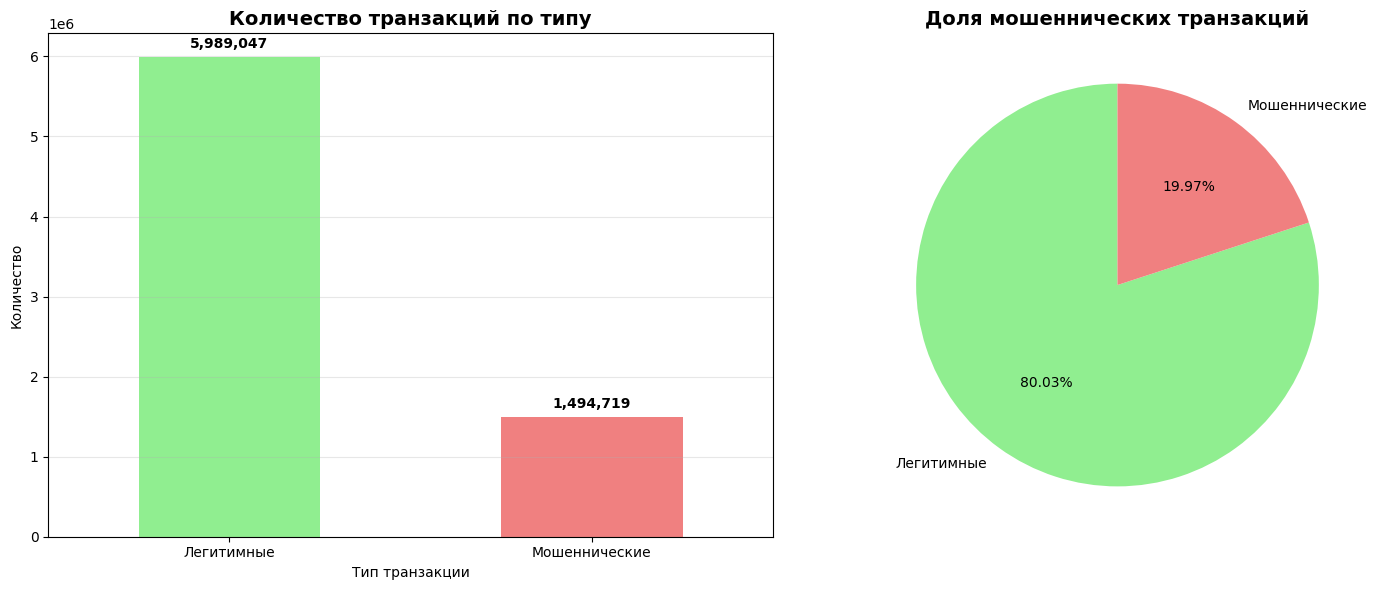

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля графиков
plt.style.use('default')
sns.set_palette("Set2")

# Распределение мошеннических транзакций
print("РАСПРЕДЕЛЕНИЕ МОШЕННИЧЕСКИХ ТРАНЗАКЦИЙ:")
print("=" * 50)

fraud_counts = df_transactions_optimized['is_fraud'].value_counts()
fraud_percentages = df_transactions_optimized['is_fraud'].value_counts(normalize=True) * 100

print("Абсолютные значения:")
print(f"Легитимные транзакции: {fraud_counts[False]:,}")
print(f"Мошеннические транзакции: {fraud_counts[True]:,}")
print()
print("Процентное соотношение:")
print(f"Легитимные: {fraud_percentages[False]:.2f}%")
print(f"Мошеннические: {fraud_percentages[True]:.2f}%")
print()

# Создание визуализации
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Абсолютные значения
fraud_counts.plot(kind='bar', ax=ax1, color=['lightgreen', 'lightcoral'])
ax1.set_title('Количество транзакций по типу', fontsize=14, fontweight='bold')
ax1.set_xlabel('Тип транзакции')
ax1.set_ylabel('Количество')
ax1.set_xticklabels(['Легитимные', 'Мошеннические'], rotation=0)
ax1.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for i, v in enumerate(fraud_counts.values):
    ax1.text(i, v + len(df_transactions_optimized) * 0.01, f'{v:,}', 
             ha='center', va='bottom', fontweight='bold')

# График 2: Процентное соотношение (круговая диаграмма)
ax2.pie(fraud_percentages.values, labels=['Легитимные', 'Мошеннические'], 
        autopct='%1.2f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
ax2.set_title('Доля мошеннических транзакций', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 2.2 Временные паттерны мошенничества


In [15]:
# Извлечение временных компонентов
df_transactions_optimized['hour'] = df_transactions_optimized['timestamp'].dt.hour
df_transactions_optimized['day_of_week'] = df_transactions_optimized['timestamp'].dt.dayofweek
df_transactions_optimized['day_name'] = df_transactions_optimized['timestamp'].dt.day_name()

# Анализ мошенничества по часам
print("МОШЕННИЧЕСТВО ПО ЧАСАМ:")
print("=" * 30)

hourly_fraud = df_transactions_optimized.groupby('hour')['is_fraud'].agg(['count', 'sum', 'mean']).reset_index()
hourly_fraud.columns = ['hour', 'total_transactions', 'fraud_count', 'fraud_rate']
hourly_fraud['fraud_percentage'] = hourly_fraud['fraud_rate'] * 100

# Топ-5 часов с наибольшей долей мошенничества
top_fraud_hours = hourly_fraud.nlargest(5, 'fraud_percentage')
print("Топ-5 часов с наивысшей долей мошенничества:")
for _, row in top_fraud_hours.iterrows():
    print(f"  {int(row['hour']):2d}:00 - {row['fraud_percentage']:.2f}% ({row['fraud_count']:,} из {row['total_transactions']:,})")
print()


МОШЕННИЧЕСТВО ПО ЧАСАМ:
Топ-5 часов с наивысшей долей мошенничества:
   1:00 - 59.26% (165,999.0 из 280,136.0)
   2:00 - 59.19% (166,025.0 из 280,472.0)
   3:00 - 59.14% (165,621.0 из 280,031.0)
   4:00 - 59.13% (166,418.0 из 281,466.0)
   0:00 - 26.66% (41,519.0 из 155,759.0)



In [18]:
# Анализ мошенничества по дням недели
print("МОШЕННИЧЕСТВО ПО ДНЯМ НЕДЕЛИ:")
print("=" * 35)

daily_fraud = df_transactions_optimized.groupby('day_name')['is_fraud'].agg(['count', 'sum', 'mean']).reset_index()
daily_fraud.columns = ['day_name', 'total_transactions', 'fraud_count', 'fraud_rate']
daily_fraud['fraud_percentage'] = daily_fraud['fraud_rate'] * 100

# Упорядочиваем дни недели
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_fraud['day_name'] = pd.Categorical(daily_fraud['day_name'], categories=day_order, ordered=True)
daily_fraud = daily_fraud.sort_values('day_name')

print("Доля мошенничества по дням недели:")
for _, row in daily_fraud.iterrows():
    print(f"  {row['day_name']:<9} - {row['fraud_percentage']:.2f}% ({row['fraud_count']:,} из {row['total_transactions']:,})")
print()

# Анализ выходных дней
weekend_analysis = df_transactions_optimized.groupby('is_weekend')['is_fraud'].agg(['count', 'sum', 'mean'])
weekend_analysis.index = ['Будни', 'Выходные']
weekend_analysis.columns = ['total_transactions', 'fraud_count', 'fraud_rate']
weekend_analysis['fraud_percentage'] = weekend_analysis['fraud_rate'] * 100

print("СРАВНЕНИЕ БУДНИ VS ВЫХОДНЫЕ:")
print("-" * 35)
for day_type, row in weekend_analysis.iterrows():
    print(f"  {day_type:<9} - {row['fraud_percentage']:.2f}% ({row['fraud_count']:,} из {row['total_transactions']:,})")


МОШЕННИЧЕСТВО ПО ДНЯМ НЕДЕЛИ:
Доля мошенничества по дням недели:
  Monday    - 19.98% (241,086 из 1,206,797)
  Tuesday   - 19.97% (241,146 из 1,207,241)
  Wednesday - 19.98% (241,475 из 1,208,750)
  Thursday  - 19.97% (192,651 из 964,723)
  Friday    - 19.96% (192,919 из 966,592)
  Saturday  - 19.95% (192,009 из 962,633)
  Sunday    - 20.00% (193,433 из 967,030)

СРАВНЕНИЕ БУДНИ VS ВЫХОДНЫЕ:
-----------------------------------
  Будни     - 19.97% (1,109,277.0 из 5,554,103.0)
  Выходные  - 19.97% (385,442.0 из 1,929,663.0)


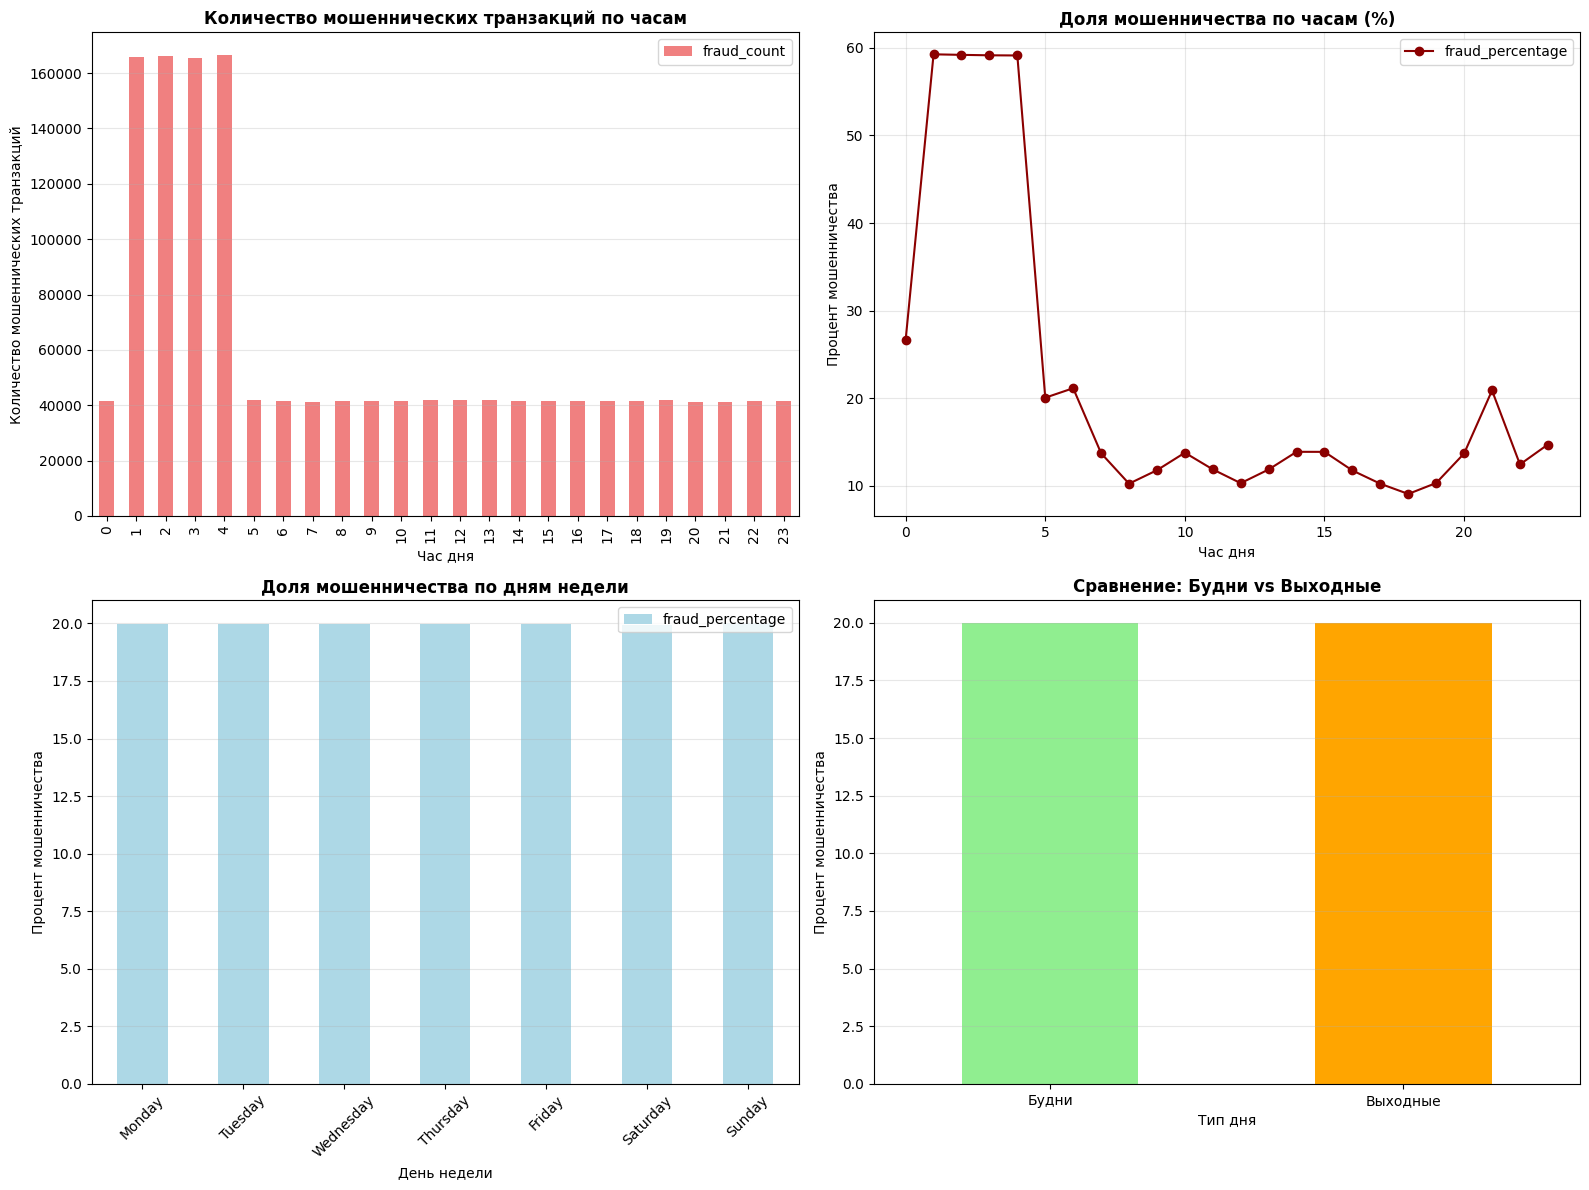

In [19]:
# Визуализация временных паттернов
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Мошенничество по часам (количество)
hourly_fraud.plot(x='hour', y='fraud_count', kind='bar', ax=ax1, color='lightcoral')
ax1.set_title('Количество мошеннических транзакций по часам', fontweight='bold')
ax1.set_xlabel('Час дня')
ax1.set_ylabel('Количество мошеннических транзакций')
ax1.grid(axis='y', alpha=0.3)

# График 2: Процент мошенничества по часам
hourly_fraud.plot(x='hour', y='fraud_percentage', kind='line', marker='o', ax=ax2, color='darkred')
ax2.set_title('Доля мошенничества по часам (%)', fontweight='bold')
ax2.set_xlabel('Час дня')
ax2.set_ylabel('Процент мошенничества')
ax2.grid(alpha=0.3)

# График 3: Мошенничество по дням недели
daily_fraud.plot(x='day_name', y='fraud_percentage', kind='bar', ax=ax3, color='lightblue')
ax3.set_title('Доля мошенничества по дням недели', fontweight='bold')
ax3.set_xlabel('День недели')
ax3.set_ylabel('Процент мошенничества')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

# График 4: Сравнение будни vs выходные
weekend_analysis['fraud_percentage'].plot(kind='bar', ax=ax4, color=['lightgreen', 'orange'])
ax4.set_title('Сравнение: Будни vs Выходные', fontweight='bold')
ax4.set_xlabel('Тип дня')
ax4.set_ylabel('Процент мошенничества')
ax4.tick_params(axis='x', rotation=0)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


# 3. АНАЛИЗ УСТРОЙСТВ И КАНАЛОВ

## 3.1 Анализ использования устройств


In [22]:
# Анализ использования устройств
print("АНАЛИЗ ИСПОЛЬЗОВАНИЯ УСТРОЙСТВ:")
print("=" * 40)

device_analysis = df_transactions_optimized.groupby('device', observed=False).agg({
    'transaction_id': 'count',
    'amount': 'sum'
}).reset_index()

device_analysis.columns = ['device', 'transaction_count', 'total_amount']
device_analysis['percentage'] = (device_analysis['transaction_count'] / len(df_transactions_optimized)) * 100
device_analysis['avg_amount'] = device_analysis['total_amount'] / device_analysis['transaction_count']

# Сортируем по количеству транзакций
device_analysis = device_analysis.sort_values('transaction_count', ascending=False)

print("Топ устройств по количеству транзакций:")
print(f"{'Устройство':<15} {'Транзакции':<12} {'Процент':<10} {'Средняя сумма':<15}")
print("-" * 60)
for _, row in device_analysis.iterrows():
    print(f"{row['device']:<15} {row['transaction_count']:>10,} {row['percentage']:>8.2f}% {row['avg_amount']:>13,.2f}")
print()

# Выводы для бизнеса
most_popular = device_analysis.iloc[0]
least_popular = device_analysis.iloc[-1]
print("ВЫВОДЫ ДЛЯ БИЗНЕСА:")
print(f"📱 Самое популярное устройство: {most_popular['device']} ({most_popular['percentage']:.1f}% транзакций)")
print(f"📱 Наименее популярное: {least_popular['device']} ({least_popular['percentage']:.1f}% транзакций)")
print(f"💰 Наибольшая средняя сумма: {device_analysis.loc[device_analysis['avg_amount'].idxmax(), 'device']} "
      f"({device_analysis['avg_amount'].max():.2f})")
print(f"💰 Наименьшая средняя сумма: {device_analysis.loc[device_analysis['avg_amount'].idxmin(), 'device']} "
      f"({device_analysis['avg_amount'].min():.2f})")


АНАЛИЗ ИСПОЛЬЗОВАНИЯ УСТРОЙСТВ:
Топ устройств по количеству транзакций:
Устройство      Транзакции   Процент    Средняя сумма  
------------------------------------------------------------
Edge             1,189,560    15.90%        496.57
iOS App          1,143,461    15.28%        513.02
Chrome           1,132,384    15.13%        520.34
Android App      1,126,117    15.05%        505.04
Firefox          1,120,952    14.98%        513.77
Safari           1,120,245    14.97%        518.37
Chip Reader        217,324     2.90%        876.73
Magnetic Stripe    217,204     2.90%        871.57
NFC Payment        216,519     2.89%        873.94

ВЫВОДЫ ДЛЯ БИЗНЕСА:
📱 Самое популярное устройство: Edge (15.9% транзакций)
📱 Наименее популярное: NFC Payment (2.9% транзакций)
💰 Наибольшая средняя сумма: Chip Reader (876.73)
💰 Наименьшая средняя сумма: Edge (496.57)


## 3.2 Мошенничество по устройствам


In [23]:
# Анализ мошенничества по устройствам
print("МОШЕННИЧЕСТВО ПО УСТРОЙСТВАМ:")
print("=" * 40)

device_fraud = df_transactions_optimized.groupby('device', observed=False)['is_fraud'].agg(['count', 'sum', 'mean']).reset_index()
device_fraud.columns = ['device', 'total_transactions', 'fraud_count', 'fraud_rate']
device_fraud['fraud_percentage'] = device_fraud['fraud_rate'] * 100

# Добавляем информацию о суммах для мошеннических транзакций
device_fraud_amounts = df_transactions_optimized[df_transactions_optimized['is_fraud']].groupby('device', observed=False)['amount'].sum().reset_index()
device_fraud_amounts.columns = ['device', 'fraud_amount']
device_fraud = device_fraud.merge(device_fraud_amounts, on='device', how='left')
device_fraud['fraud_amount'] = device_fraud['fraud_amount'].fillna(0)

# Сортируем по проценту мошенничества
device_fraud = device_fraud.sort_values('fraud_percentage', ascending=False)

print("Устройства по уровню мошенничества:")
print(f"{'Устройство':<15} {'Мошенничество':<13} {'Процент':<10} {'Сумма ущерба':<15}")
print("-" * 65)
for _, row in device_fraud.iterrows():
    print(f"{row['device']:<15} {row['fraud_count']:>11,} {row['fraud_percentage']:>8.2f}% {row['fraud_amount']:>13,.0f}")
print()

# Статистические выводы
highest_fraud_device = device_fraud.iloc[0]
lowest_fraud_device = device_fraud.iloc[-1]
total_fraud_amount = device_fraud['fraud_amount'].sum()

print("АНАЛИЗ РИСКОВ ПО УСТРОЙСТВАМ:")
print(f"🚨 Самый рискованный: {highest_fraud_device['device']} ({highest_fraud_device['fraud_percentage']:.2f}% мошенничества)")
print(f"✅ Самый безопасный: {lowest_fraud_device['device']} ({lowest_fraud_device['fraud_percentage']:.2f}% мошенничества)")
print(f"💸 Общий ущерб от мошенничества: ${total_fraud_amount:,.0f}")

# Устройства с наибольшим ущербом
max_damage_device = device_fraud.loc[device_fraud['fraud_amount'].idxmax()]
print(f"💥 Наибольший ущерб: {max_damage_device['device']} (${max_damage_device['fraud_amount']:,.0f})")


МОШЕННИЧЕСТВО ПО УСТРОЙСТВАМ:
Устройства по уровню мошенничества:
Устройство      Мошенничество Процент    Сумма ущерба   
-----------------------------------------------------------------
Chip Reader         217,324   100.00%   190,534,213
NFC Payment         216,519   100.00%   189,223,981
Magnetic Stripe     217,204   100.00%   189,309,130
Firefox             142,171    12.68%   124,407,604
Safari              141,379    12.62%   122,960,278
Android App         140,844    12.51%   122,867,230
Chrome              140,087    12.37%   122,164,343
iOS App             140,306    12.27%   123,377,054
Edge                138,885    11.68%   122,447,494

АНАЛИЗ РИСКОВ ПО УСТРОЙСТВАМ:
🚨 Самый рискованный: Chip Reader (100.00% мошенничества)
✅ Самый безопасный: Edge (11.68% мошенничества)
💸 Общий ущерб от мошенничества: $1,307,291,327
💥 Наибольший ущерб: Chip Reader ($190,534,213)


## 3.3 Анализ каналов транзакций


In [25]:
# Анализ каналов транзакций
print("АНАЛИЗ КАНАЛОВ ТРАНЗАКЦИЙ:")
print("=" * 35)

channel_analysis = df_transactions_optimized.groupby('channel', observed=False).agg({
    'transaction_id': 'count',
    'amount': ['sum', 'mean'],
    'is_fraud': ['sum', 'mean']
}).reset_index()

# Выравниваем названия столбцов
channel_analysis.columns = ['channel', 'transaction_count', 'total_amount', 'avg_amount', 'fraud_count', 'fraud_rate']
channel_analysis['percentage'] = (channel_analysis['transaction_count'] / len(df_transactions_optimized)) * 100
channel_analysis['fraud_percentage'] = channel_analysis['fraud_rate'] * 100

# Сортируем по количеству транзакций
channel_analysis = channel_analysis.sort_values('transaction_count', ascending=False)

print("Анализ по каналам:")
print(f"{'Канал':<8} {'Транзакции':<12} {'Процент':<10} {'Ср. сумма':<12} {'Мошенничество':<15}")
print("-" * 70)
for _, row in channel_analysis.iterrows():
    print(f"{row['channel']:<8} {row['transaction_count']:>10,} {row['percentage']:>8.2f}% "
          f"{row['avg_amount']:>10,.2f} {row['fraud_percentage']:>13.2f}%")
print()

print("КЛЮЧЕВЫЕ ИНСАЙТЫ ПО КАНАЛАМ:")
most_popular_channel = channel_analysis.iloc[0]
print(f"📊 Самый популярный канал: {most_popular_channel['channel']} ({most_popular_channel['percentage']:.1f}% транзакций)")

highest_avg_channel = channel_analysis.loc[channel_analysis['avg_amount'].idxmax()]
print(f"💰 Наибольшая средняя сумма: {highest_avg_channel['channel']} (${highest_avg_channel['avg_amount']:.2f})")

safest_channel = channel_analysis.loc[channel_analysis['fraud_percentage'].idxmin()]
riskiest_channel = channel_analysis.loc[channel_analysis['fraud_percentage'].idxmax()]
print(f"✅ Самый безопасный канал: {safest_channel['channel']} ({safest_channel['fraud_percentage']:.2f}% мошенничества)")
print(f"🚨 Самый рискованный канал: {riskiest_channel['channel']} ({riskiest_channel['fraud_percentage']:.2f}% мошенничества)")


АНАЛИЗ КАНАЛОВ ТРАНЗАКЦИЙ:
Анализ по каналам:
Канал    Транзакции   Процент    Ср. сумма    Мошенничество  
----------------------------------------------------------------------
web       4,563,141    60.97%     512.04         12.33%
mobile    2,269,578    30.33%     509.06         12.39%
pos         651,047     8.70%     874.08        100.00%

КЛЮЧЕВЫЕ ИНСАЙТЫ ПО КАНАЛАМ:
📊 Самый популярный канал: web (61.0% транзакций)
💰 Наибольшая средняя сумма: pos ($874.08)
✅ Самый безопасный канал: web (12.33% мошенничества)
🚨 Самый рискованный канал: pos (100.00% мошенничества)


## 3.4 Связь между устройством и каналом


In [27]:
# Кросс-таблица устройств и каналов
print("СВЯЗЬ МЕЖДУ УСТРОЙСТВОМ И КАНАЛОМ:")
print("=" * 45)

device_channel_crosstab = pd.crosstab(df_transactions_optimized['device'], 
                                     df_transactions_optimized['channel'], 
                                     margins=True)
print("Количество транзакций по устройствам и каналам:")
display(device_channel_crosstab)
print()

# Процентное распределение
device_channel_pct = pd.crosstab(df_transactions_optimized['device'], 
                                df_transactions_optimized['channel'], 
                                normalize='index') * 100
print("Процентное распределение каналов по устройствам:")
display(device_channel_pct.round(2))
print()

# Анализ мошенничества по комбинациям устройство-канал
device_channel_fraud = df_transactions_optimized.groupby(['device', 'channel'], observed=False).agg({
    'transaction_id': 'count',
    'is_fraud': ['sum', 'mean']
}).reset_index()

device_channel_fraud.columns = ['device', 'channel', 'total_transactions', 'fraud_count', 'fraud_rate']
device_channel_fraud['fraud_percentage'] = device_channel_fraud['fraud_rate'] * 100
device_channel_fraud = device_channel_fraud.sort_values('fraud_percentage', ascending=False)

print("САМЫЕ РИСКОВАННЫЕ КОМБИНАЦИИ (устройство + канал):")
print(f"{'Устройство':<15} {'Канал':<8} {'Транзакции':<12} {'Мошенничество %':<15}")
print("-" * 55)
for _, row in device_channel_fraud.head(10).iterrows():
    if row['total_transactions'] >= 1000:  # Показываем только значимые комбинации
        print(f"{row['device']:<15} {row['channel']:<8} {row['total_transactions']:>10,} {row['fraud_percentage']:>13.2f}%")


СВЯЗЬ МЕЖДУ УСТРОЙСТВОМ И КАНАЛОМ:
Количество транзакций по устройствам и каналам:


channel,mobile,pos,web,All
device,,,,
Android App,1126117,0,0,1126117
Chip Reader,0,217324,0,217324
Chrome,0,0,1132384,1132384
Edge,0,0,1189560,1189560
Firefox,0,0,1120952,1120952
Magnetic Stripe,0,217204,0,217204
NFC Payment,0,216519,0,216519
Safari,0,0,1120245,1120245
iOS App,1143461,0,0,1143461



Процентное распределение каналов по устройствам:


channel,mobile,pos,web
device,,,
Android App,100.0,0.0,0.0
Chip Reader,0.0,100.0,0.0
Chrome,0.0,0.0,100.0
Edge,0.0,0.0,100.0
Firefox,0.0,0.0,100.0
Magnetic Stripe,0.0,100.0,0.0
NFC Payment,0.0,100.0,0.0
Safari,0.0,0.0,100.0
iOS App,100.0,0.0,0.0



САМЫЕ РИСКОВАННЫЕ КОМБИНАЦИИ (устройство + канал):
Устройство      Канал    Транзакции   Мошенничество %
-------------------------------------------------------
Chip Reader     pos         217,324        100.00%
NFC Payment     pos         216,519        100.00%
Magnetic Stripe pos         217,204        100.00%
Firefox         web       1,120,952         12.68%
Safari          web       1,120,245         12.62%
Android App     mobile    1,126,117         12.51%
Chrome          web       1,132,384         12.37%
iOS App         mobile    1,143,461         12.27%
Edge            web       1,189,560         11.68%


C:\Users\Ygrick\AppData\Local\Temp\ipykernel_23772\2189955334.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_pivot = df_transactions_optimized.groupby(['device', 'channel'])['is_fraud'].mean().unstack() * 100


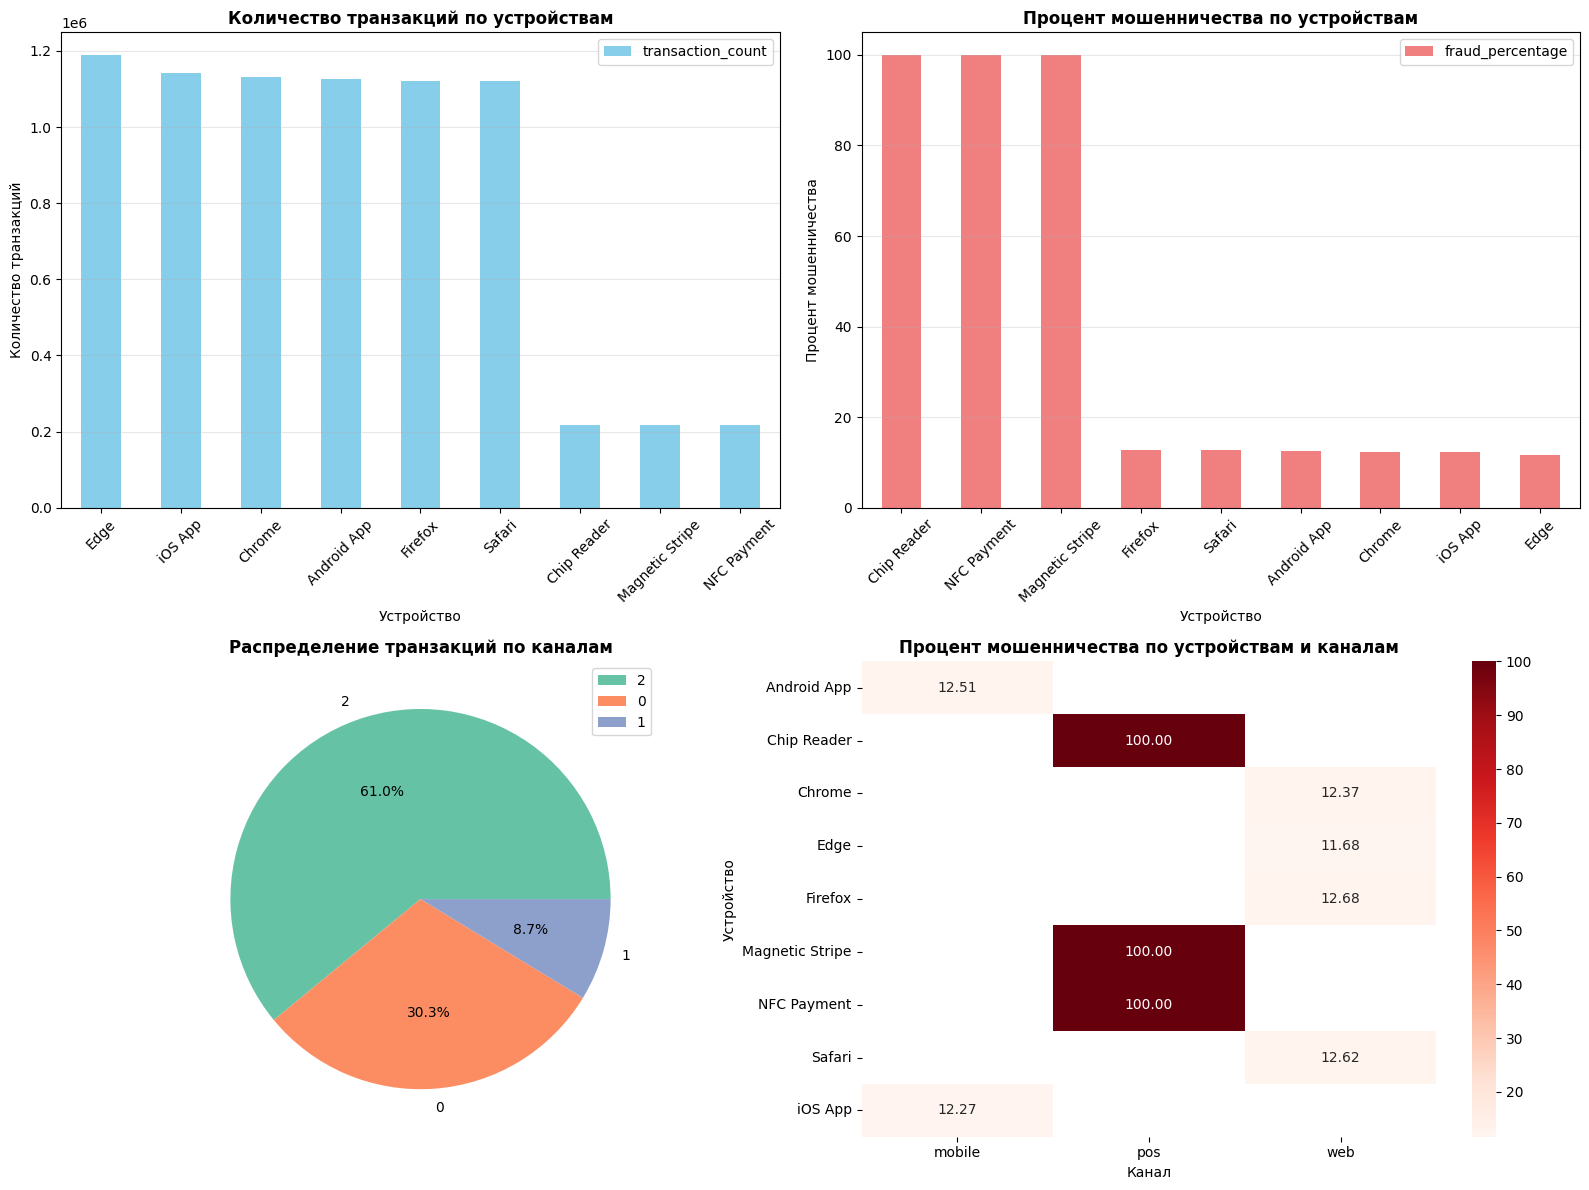

In [28]:
# Визуализация анализа устройств и каналов
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Количество транзакций по устройствам
device_analysis.plot(x='device', y='transaction_count', kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Количество транзакций по устройствам', fontweight='bold')
ax1.set_xlabel('Устройство')
ax1.set_ylabel('Количество транзакций')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# График 2: Процент мошенничества по устройствам
device_fraud.plot(x='device', y='fraud_percentage', kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Процент мошенничества по устройствам', fontweight='bold')
ax2.set_xlabel('Устройство')
ax2.set_ylabel('Процент мошенничества')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# График 3: Распределение каналов
channel_analysis.plot(x='channel', y='percentage', kind='pie', ax=ax3, autopct='%1.1f%%')
ax3.set_title('Распределение транзакций по каналам', fontweight='bold')
ax3.set_ylabel('')

# График 4: Heatmap устройства vs каналы (процент мошенничества)
fraud_pivot = df_transactions_optimized.groupby(['device', 'channel'])['is_fraud'].mean().unstack() * 100
sns.heatmap(fraud_pivot, annot=True, fmt='.2f', cmap='Reds', ax=ax4)
ax4.set_title('Процент мошенничества по устройствам и каналам', fontweight='bold')
ax4.set_xlabel('Канал')
ax4.set_ylabel('Устройство')

plt.tight_layout()
plt.show()


# 4. ГЕОГРАФИЧЕСКИЙ АНАЛИЗ

## 4.1 Анализ транзакций по странам


In [30]:
# Анализ транзакций по странам
print("АНАЛИЗ ТРАНЗАКЦИЙ ПО СТРАНАМ:")
print("=" * 40)

country_analysis = df_transactions_optimized.groupby('country', observed=False).agg({
    'transaction_id': 'count',
    'amount': ['sum', 'mean'],
    'is_fraud': ['sum', 'mean']
}).reset_index()

# Выравниваем названия столбцов
country_analysis.columns = ['country', 'transaction_count', 'total_amount', 'avg_amount', 'fraud_count', 'fraud_rate']
country_analysis['percentage'] = (country_analysis['transaction_count'] / len(df_transactions_optimized)) * 100
country_analysis['fraud_percentage'] = country_analysis['fraud_rate'] * 100
country_analysis['total_amount_millions'] = country_analysis['total_amount'] / 1_000_000

# Сортируем по количеству транзакций
country_analysis = country_analysis.sort_values('transaction_count', ascending=False)

print("Топ-15 стран по количеству транзакций:")
print(f"{'Страна':<12} {'Транзакции':<12} {'Процент':<10} {'Сумма (млн)':<12} {'Ср. сумма':<12} {'Мошенничество %':<15}")
print("-" * 85)
for _, row in country_analysis.head(15).iterrows():
    print(f"{row['country']:<12} {row['transaction_count']:>10,} {row['percentage']:>8.2f}% "
          f"{row['total_amount_millions']:>10.1f} {row['avg_amount']:>10,.2f} {row['fraud_percentage']:>13.2f}%")
print()

# Ключевые инсайты
total_countries = len(country_analysis)
top_5_countries_share = country_analysis.head(5)['percentage'].sum()

print("КЛЮЧЕВЫЕ ИНСАЙТЫ ПО СТРАНАМ:")
print(f"🌍 Всего стран: {total_countries}")
print(f"📊 Топ-5 стран покрывают: {top_5_countries_share:.1f}% всех транзакций")

# Наиболее прибыльные страны
most_profitable = country_analysis.loc[country_analysis['total_amount'].idxmax()]
highest_avg = country_analysis.loc[country_analysis['avg_amount'].idxmax()]
print(f"💰 Наибольший оборот: {most_profitable['country']} (${most_profitable['total_amount']:,.0f})")
print(f"💳 Наибольшая средняя сумма: {highest_avg['country']} (${highest_avg['avg_amount']:.2f})")

# Анализ безопасности по странам
safest_countries = country_analysis[country_analysis['transaction_count'] >= 10000].nsmallest(5, 'fraud_percentage')
riskiest_countries = country_analysis[country_analysis['transaction_count'] >= 10000].nlargest(5, 'fraud_percentage')

print(f"✅ Самая безопасная страна (>10k транзакций): {safest_countries.iloc[0]['country']} ({safest_countries.iloc[0]['fraud_percentage']:.2f}%)")
print(f"🚨 Самая рискованная страна (>10k транзакций): {riskiest_countries.iloc[0]['country']} ({riskiest_countries.iloc[0]['fraud_percentage']:.2f}%)")


АНАЛИЗ ТРАНЗАКЦИЙ ПО СТРАНАМ:
Топ-15 стран по количеству транзакций:
Страна       Транзакции   Процент    Сумма (млн)  Ср. сумма    Мошенничество %
-------------------------------------------------------------------------------------
Nigeria         849,840    11.36%      159.8     187.99         35.14%
Brazil          804,800    10.75%      544.1     676.08         37.11%
Russia          793,730    10.61%      468.5     590.25         37.72%
Mexico          785,704    10.50%      607.1     772.66         38.03%
Singapore       588,668     7.87%      362.6     616.04          6.36%
France          541,287     7.23%      286.5     529.36          6.91%
UK              538,493     7.20%      296.4     550.41          6.94%
Canada          532,632     7.12%      270.2     507.25          7.00%
Japan           527,393     7.05%      230.7     437.52          7.13%
Germany         524,464     7.01%      287.6     548.41          7.09%
USA             500,060     6.68%      282.8     565.54 

## 4.2 Транзакции вне домашней страны


In [32]:
# Анализ транзакций вне домашней страны
print("АНАЛИЗ МЕЖДУНАРОДНЫХ ТРАНЗАКЦИЙ:")
print("=" * 45)

international_analysis = df_transactions_optimized.groupby('is_outside_home_country').agg({
    'transaction_id': 'count',
    'amount': ['sum', 'mean'],
    'is_fraud': ['sum', 'mean']
}).reset_index()

international_analysis.columns = ['is_international', 'transaction_count', 'total_amount', 'avg_amount', 'fraud_count', 'fraud_rate']
international_analysis['percentage'] = (international_analysis['transaction_count'] / len(df_transactions_optimized)) * 100
international_analysis['fraud_percentage'] = international_analysis['fraud_rate'] * 100
international_analysis['location_type'] = international_analysis['is_international'].map({False: 'Домашняя страна', True: 'Зарубежные'})

print("Сравнение домашних и зарубежных транзакций:")
print(f"{'Тип':<15} {'Транзакции':<12} {'Процент':<10} {'Ср. сумма':<12} {'Мошенничество %':<15}")
print("-" * 70)
for _, row in international_analysis.iterrows():
    print(f"{row['location_type']:<15} {row['transaction_count']:>10,} {row['percentage']:>8.2f}% "
          f"{row['avg_amount']:>10,.2f} {row['fraud_percentage']:>13.2f}%")
print()

# Статистические выводы
domestic_fraud = international_analysis[international_analysis['is_international'] == False]['fraud_percentage'].iloc[0]
international_fraud = international_analysis[international_analysis['is_international'] == True]['fraud_percentage'].iloc[0]
fraud_ratio = international_fraud / domestic_fraud

print("СТАТИСТИЧЕСКИЕ ВЫВОДЫ:")
print(f"🏠 Мошенничество в домашней стране: {domestic_fraud:.2f}%")
print(f"🌍 Мошенничество в зарубежных операциях: {international_fraud:.2f}%")
print(f"📊 Зарубежные операции в {fraud_ratio:.1f}x раз рискованнее домашних")

# Анализ стран с высоким риском для международных операций
print("\nАНАЛИЗ РИСКОВАННЫХ МЕЖДУНАРОДНЫХ НАПРАВЛЕНИЙ:")
international_transactions = df_transactions_optimized[df_transactions_optimized['is_outside_home_country'] == True]
risky_international = international_transactions.groupby('country', observed=False)['is_fraud'].agg(['count', 'sum', 'mean']).reset_index()
risky_international.columns = ['country', 'total_transactions', 'fraud_count', 'fraud_rate']
risky_international['fraud_percentage'] = risky_international['fraud_rate'] * 100

# Фильтруем страны с достаточным количеством транзакций
risky_international_filtered = risky_international[risky_international['total_transactions'] >= 1000]
risky_international_filtered = risky_international_filtered.sort_values('fraud_percentage', ascending=False)

print("Топ-10 самых рискованных стран для международных операций (>1000 транзакций):")
print(f"{'Страна':<12} {'Транзакции':<12} {'Мошенничество':<13} {'Процент':<10}")
print("-" * 50)
for _, row in risky_international_filtered.head(10).iterrows():
    print(f"{row['country']:<12} {row['total_transactions']:>10,} {row['fraud_count']:>11,} {row['fraud_percentage']:>8.2f}%")


АНАЛИЗ МЕЖДУНАРОДНЫХ ТРАНЗАКЦИЙ:
Сравнение домашних и зарубежных транзакций:
Тип             Транзакции   Процент    Ср. сумма    Мошенничество %
----------------------------------------------------------------------
Домашняя страна  5,073,605    67.79%     468.76          2.49%
Зарубежные       2,410,161    32.21%     698.15         56.78%

СТАТИСТИЧЕСКИЕ ВЫВОДЫ:
🏠 Мошенничество в домашней стране: 2.49%
🌍 Мошенничество в зарубежных операциях: 56.78%
📊 Зарубежные операции в 22.8x раз рискованнее домашних

АНАЛИЗ РИСКОВАННЫХ МЕЖДУНАРОДНЫХ НАПРАВЛЕНИЙ:
Топ-10 самых рискованных стран для международных операций (>1000 транзакций):
Страна       Транзакции   Мошенничество Процент   
--------------------------------------------------
Brazil          359,892     273,421    75.97%
Mexico          362,054     274,922    75.93%
Russia          361,943     274,809    75.93%
Nigeria         357,004     270,642    75.81%
Australia       122,050      34,832    28.54%
Japan           121,784      34,5

## 4.3 Анализ по размеру города


In [34]:
# Анализ по размеру города
print("АНАЛИЗ ПО РАЗМЕРУ ГОРОДА:")
print("=" * 30)

city_size_analysis = df_transactions_optimized.groupby('city_size', observed=False).agg({
    'transaction_id': 'count',
    'amount': ['sum', 'mean'],
    'is_fraud': ['sum', 'mean']
}).reset_index()

city_size_analysis.columns = ['city_size', 'transaction_count', 'total_amount', 'avg_amount', 'fraud_count', 'fraud_rate']
city_size_analysis['percentage'] = (city_size_analysis['transaction_count'] / len(df_transactions_optimized)) * 100
city_size_analysis['fraud_percentage'] = city_size_analysis['fraud_rate'] * 100

# Упорядочиваем по размеру города
size_order = ['small', 'medium', 'large']
city_size_analysis['city_size'] = pd.Categorical(city_size_analysis['city_size'], categories=size_order, ordered=True)
city_size_analysis = city_size_analysis.sort_values('city_size')

print("Распределение транзакций по размеру городов:")
print(f"{'Размер города':<12} {'Транзакции':<12} {'Процент':<10} {'Ср. сумма':<12} {'Мошенничество %':<15}")
print("-" * 70)
for _, row in city_size_analysis.iterrows():
    print(f"{row['city_size']:<12} {row['transaction_count']:>10,} {row['percentage']:>8.2f}% "
          f"{row['avg_amount']:>10,.2f} {row['fraud_percentage']:>13.2f}%")
print()

# Инсайты по размеру городов
most_transactions = city_size_analysis.loc[city_size_analysis['transaction_count'].idxmax()]
highest_fraud = city_size_analysis.loc[city_size_analysis['fraud_percentage'].idxmax()]
lowest_fraud = city_size_analysis.loc[city_size_analysis['fraud_percentage'].idxmin()]

print("ИНСАЙТЫ ПО ГЕОГРАФИЧЕСКОМУ РАСПРЕДЕЛЕНИЮ:")
print(f"🏙️ Больше всего транзакций: {most_transactions['city_size']} города ({most_transactions['percentage']:.1f}%)")
print(f"🚨 Самый высокий риск: {highest_fraud['city_size']} города ({highest_fraud['fraud_percentage']:.2f}% мошенничества)")
print(f"✅ Самый низкий риск: {lowest_fraud['city_size']} города ({lowest_fraud['fraud_percentage']:.2f}% мошенничества)")

# Дополнительный анализ: средняя сумма по размеру города
highest_avg_amount = city_size_analysis.loc[city_size_analysis['avg_amount'].idxmax()]
print(f"💰 Наибольшая средняя сумма: {highest_avg_amount['city_size']} города (${highest_avg_amount['avg_amount']:.2f})")


АНАЛИЗ ПО РАЗМЕРУ ГОРОДА:
Распределение транзакций по размеру городов:
Размер города Транзакции   Процент    Ср. сумма    Мошенничество %
----------------------------------------------------------------------
medium        7,284,598    97.34%     542.00         20.31%
large           199,168     2.66%     565.76          7.46%

ИНСАЙТЫ ПО ГЕОГРАФИЧЕСКОМУ РАСПРЕДЕЛЕНИЮ:
🏙️ Больше всего транзакций: medium города (97.3%)
🚨 Самый высокий риск: medium города (20.31% мошенничества)
✅ Самый низкий риск: large города (7.46% мошенничества)
💰 Наибольшая средняя сумма: large города ($565.76)


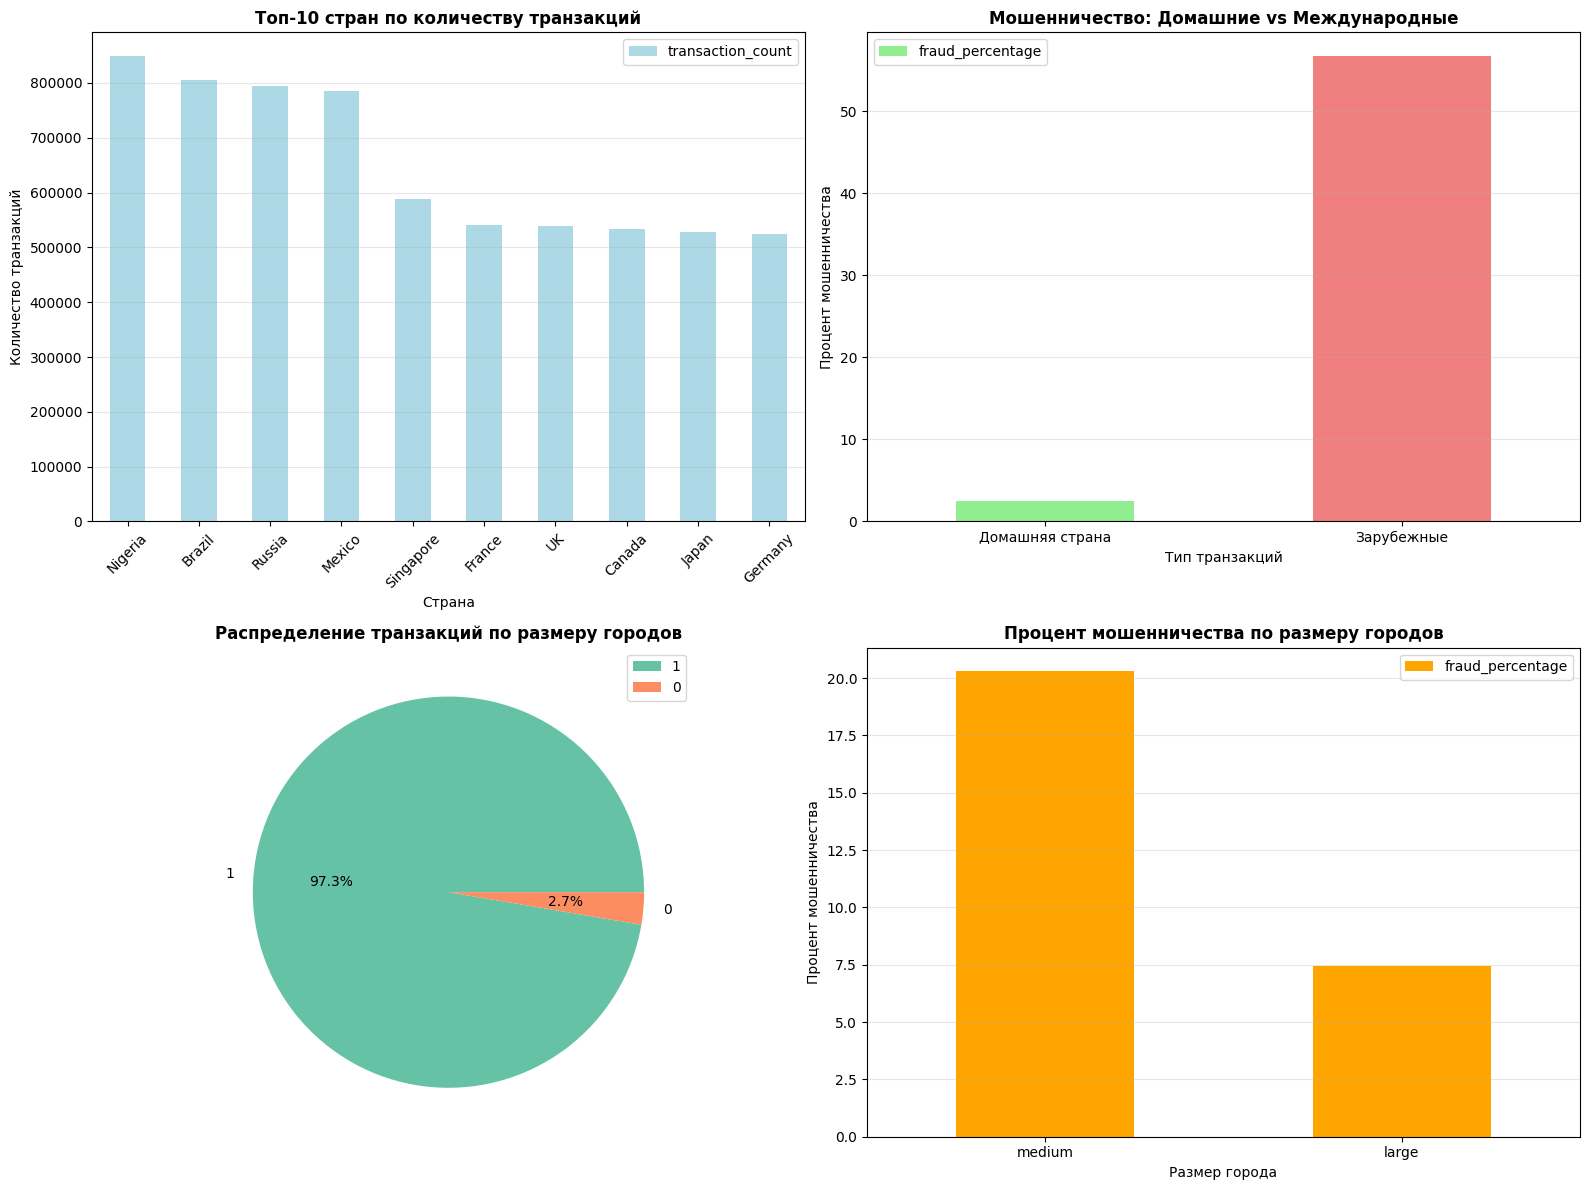

In [35]:
# Визуализация географического анализа
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Топ-10 стран по количеству транзакций
top_10_countries = country_analysis.head(10)
top_10_countries.plot(x='country', y='transaction_count', kind='bar', ax=ax1, color='lightblue')
ax1.set_title('Топ-10 стран по количеству транзакций', fontweight='bold')
ax1.set_xlabel('Страна')
ax1.set_ylabel('Количество транзакций')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# График 2: Сравнение домашних и международных транзакций (мошенничество)
international_analysis.plot(x='location_type', y='fraud_percentage', kind='bar', ax=ax2, color=['lightgreen', 'lightcoral'])
ax2.set_title('Мошенничество: Домашние vs Международные', fontweight='bold')
ax2.set_xlabel('Тип транзакций')
ax2.set_ylabel('Процент мошенничества')
ax2.tick_params(axis='x', rotation=0)
ax2.grid(axis='y', alpha=0.3)

# График 3: Распределение по размеру городов
city_size_analysis.plot(x='city_size', y='percentage', kind='pie', ax=ax3, autopct='%1.1f%%')
ax3.set_title('Распределение транзакций по размеру городов', fontweight='bold')
ax3.set_ylabel('')

# График 4: Мошенничество по размеру городов
city_size_analysis.plot(x='city_size', y='fraud_percentage', kind='bar', ax=ax4, color='orange')
ax4.set_title('Процент мошенничества по размеру городов', fontweight='bold')
ax4.set_xlabel('Размер города')
ax4.set_ylabel('Процент мошенничества')
ax4.tick_params(axis='x', rotation=0)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


# 5. АНАЛИЗ ПРОДАВЦОВ И КАТЕГОРИЙ

## 5.1 Популярные категории и типы продавцов


In [36]:
# Анализ популярных категорий продавцов
print("АНАЛИЗ КАТЕГОРИЙ ПРОДАВЦОВ:")
print("=" * 35)

vendor_category_analysis = df_transactions_optimized.groupby('vendor_category').agg({
    'transaction_id': 'count',
    'amount': ['sum', 'mean'],
    'is_fraud': ['sum', 'mean']
}).reset_index()

vendor_category_analysis.columns = ['vendor_category', 'transaction_count', 'total_amount', 'avg_amount', 'fraud_count', 'fraud_rate']
vendor_category_analysis['percentage'] = (vendor_category_analysis['transaction_count'] / len(df_transactions_optimized)) * 100
vendor_category_analysis['fraud_percentage'] = vendor_category_analysis['fraud_rate'] * 100
vendor_category_analysis['total_amount_millions'] = vendor_category_analysis['total_amount'] / 1_000_000

# Сортируем по количеству транзакций
vendor_category_analysis = vendor_category_analysis.sort_values('transaction_count', ascending=False)

print("Категории продавцов по популярности:")
print(f"{'Категория':<15} {'Транзакции':<12} {'Процент':<10} {'Оборот (млн)':<12} {'Ср. сумма':<12} {'Мошенничество %':<15}")
print("-" * 90)
for _, row in vendor_category_analysis.iterrows():
    print(f"{row['vendor_category']:<15} {row['transaction_count']:>10,} {row['percentage']:>8.2f}% "
          f"{row['total_amount_millions']:>10.1f} {row['avg_amount']:>10,.2f} {row['fraud_percentage']:>13.2f}%")
print()

# Ключевые инсайты по категориям
most_popular_category = vendor_category_analysis.iloc[0]
most_profitable_category = vendor_category_analysis.loc[vendor_category_analysis['total_amount'].idxmax()]
highest_avg_category = vendor_category_analysis.loc[vendor_category_analysis['avg_amount'].idxmax()]

print("КЛЮЧЕВЫЕ ИНСАЙТЫ ПО КАТЕГОРИЯМ:")
print(f"📊 Самая популярная категория: {most_popular_category['vendor_category']} ({most_popular_category['percentage']:.1f}% транзакций)")
print(f"💰 Самая прибыльная категория: {most_profitable_category['vendor_category']} (${most_profitable_category['total_amount']:,.0f})")
print(f"💳 Наибольшая средняя сумма: {highest_avg_category['vendor_category']} (${highest_avg_category['avg_amount']:.2f})")

# Анализ рисков по категориям
safest_category = vendor_category_analysis.loc[vendor_category_analysis['fraud_percentage'].idxmin()]
riskiest_category = vendor_category_analysis.loc[vendor_category_analysis['fraud_percentage'].idxmax()]
print(f"✅ Самая безопасная категория: {safest_category['vendor_category']} ({safest_category['fraud_percentage']:.2f}% мошенничества)")
print(f"🚨 Самая рискованная категория: {riskiest_category['vendor_category']} ({riskiest_category['fraud_percentage']:.2f}% мошенничества)")


АНАЛИЗ КАТЕГОРИЙ ПРОДАВЦОВ:


C:\Users\Ygrick\AppData\Local\Temp\ipykernel_23772\3319795743.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vendor_category_analysis = df_transactions_optimized.groupby('vendor_category').agg({


Категории продавцов по популярности:
Категория       Транзакции   Процент    Оборот (млн) Ср. сумма    Мошенничество %
------------------------------------------------------------------------------------------
Healthcare         936,770    12.52%      482.3     514.89         19.94%
Restaurant         936,178    12.51%      302.7     323.33         19.97%
Entertainment      936,173    12.51%      328.0     350.31         19.96%
Retail             935,883    12.51%      624.5     667.31         19.94%
Travel             935,790    12.50%      974.0   1,040.83         20.03%
Gas                935,401    12.50%      480.1     513.26         19.97%
Grocery            934,029    12.48%      389.1     416.53         20.02%
Education          933,542    12.47%      480.3     514.49         19.95%

КЛЮЧЕВЫЕ ИНСАЙТЫ ПО КАТЕГОРИЯМ:
📊 Самая популярная категория: Healthcare (12.5% транзакций)
💰 Самая прибыльная категория: Travel ($973,994,568)
💳 Наибольшая средняя сумма: Travel ($1040.83)
✅ Самая

In [38]:
# Анализ типов продавцов
print("\nАНАЛИЗ ТИПОВ ПРОДАВЦОВ:")
print("=" * 30)

vendor_type_analysis = df_transactions_optimized.groupby('vendor_type', observed=False).agg({
    'transaction_id': 'count',
    'amount': ['sum', 'mean'],
    'is_fraud': ['sum', 'mean']
}).reset_index()

vendor_type_analysis.columns = ['vendor_type', 'transaction_count', 'total_amount', 'avg_amount', 'fraud_count', 'fraud_rate']
vendor_type_analysis['percentage'] = (vendor_type_analysis['transaction_count'] / len(df_transactions_optimized)) * 100
vendor_type_analysis['fraud_percentage'] = vendor_type_analysis['fraud_rate'] * 100

# Сортируем по количеству транзакций
vendor_type_analysis = vendor_type_analysis.sort_values('transaction_count', ascending=False)

print("Типы продавцов по популярности:")
print(f"{'Тип':<12} {'Транзакции':<12} {'Процент':<10} {'Ср. сумма':<12} {'Мошенничество %':<15}")
print("-" * 70)
for _, row in vendor_type_analysis.iterrows():
    print(f"{row['vendor_type']:<12} {row['transaction_count']:>10,} {row['percentage']:>8.2f}% "
          f"{row['avg_amount']:>10,.2f} {row['fraud_percentage']:>13.2f}%")
print()

# Комбинированный анализ: категория + тип
print("\nТОП-10 КОМБИНАЦИЙ КАТЕГОРИЯ + ТИП:")
print("=" * 45)

category_type_analysis = df_transactions_optimized.groupby(['vendor_category', 'vendor_type'], observed=False).agg({
    'transaction_id': 'count',
    'amount': 'mean',
    'is_fraud': 'mean'
}).reset_index()

category_type_analysis.columns = ['vendor_category', 'vendor_type', 'transaction_count', 'avg_amount', 'fraud_rate']
category_type_analysis['fraud_percentage'] = category_type_analysis['fraud_rate'] * 100
category_type_analysis = category_type_analysis.sort_values('transaction_count', ascending=False)

print(f"{'Категория':<15} {'Тип':<12} {'Транзакции':<12} {'Ср. сумма':<12} {'Мошенничество %':<15}")
print("-" * 75)
for _, row in category_type_analysis.head(10).iterrows():
    print(f"{row['vendor_category']:<15} {row['vendor_type']:<12} {row['transaction_count']:>10,} "
          f"{row['avg_amount']:>10,.2f} {row['fraud_percentage']:>13.2f}%")



АНАЛИЗ ТИПОВ ПРОДАВЦОВ:
Типы продавцов по популярности:
Тип          Транзакции   Процент    Ср. сумма    Мошенничество %
----------------------------------------------------------------------
online        1,401,650    18.73%     594.78         19.93%
physical        935,039    12.49%     448.97         20.02%
medical         468,393     6.26%     514.83         19.90%
pharmacy        468,377     6.26%     514.94         19.98%
local           467,902     6.25%     513.04         19.96%
major           467,499     6.25%     513.48         19.98%
supplies        466,765     6.24%     515.02         19.98%
fast_food       312,805     4.18%     204.15         20.07%
events          312,598     4.18%     515.34         20.00%
streaming       312,091     4.17%     217.68         19.93%
premium         311,695     4.16%     515.95         19.92%
casual          311,678     4.16%     250.30         19.92%
gaming          311,484     4.16%     317.60         19.96%
hotels          234,311   

## 5.2 Высокорисковые продавцы


In [39]:
# Анализ высокорисковых продавцов
print("АНАЛИЗ ВЫСОКОРИСКОВЫХ ПРОДАВЦОВ:")
print("=" * 40)

# Сравнение высокорисковых и обычных продавцов
risk_vendor_analysis = df_transactions_optimized.groupby('is_high_risk_vendor', observed=False).agg({
    'transaction_id': 'count',
    'amount': ['sum', 'mean'],
    'is_fraud': ['sum', 'mean']
}).reset_index()

risk_vendor_analysis.columns = ['is_high_risk', 'transaction_count', 'total_amount', 'avg_amount', 'fraud_count', 'fraud_rate']
risk_vendor_analysis['percentage'] = (risk_vendor_analysis['transaction_count'] / len(df_transactions_optimized)) * 100
risk_vendor_analysis['fraud_percentage'] = risk_vendor_analysis['fraud_rate'] * 100
risk_vendor_analysis['risk_type'] = risk_vendor_analysis['is_high_risk'].map({False: 'Обычные', True: 'Высокорисковые'})

print("Сравнение обычных и высокорисковых продавцов:")
print(f"{'Тип продавца':<15} {'Транзакции':<12} {'Процент':<10} {'Ср. сумма':<12} {'Мошенничество %':<15}")
print("-" * 70)
for _, row in risk_vendor_analysis.iterrows():
    print(f"{row['risk_type']:<15} {row['transaction_count']:>10,} {row['percentage']:>8.2f}% "
          f"{row['avg_amount']:>10,.2f} {row['fraud_percentage']:>13.2f}%")
print()

# Статистические выводы
normal_fraud = risk_vendor_analysis[risk_vendor_analysis['is_high_risk'] == False]['fraud_percentage'].iloc[0]
high_risk_fraud = risk_vendor_analysis[risk_vendor_analysis['is_high_risk'] == True]['fraud_percentage'].iloc[0]
risk_multiplier = high_risk_fraud / normal_fraud

print("СТАТИСТИЧЕСКИЕ ВЫВОДЫ:")
print(f"📊 Обычные продавцы: {normal_fraud:.2f}% мошенничества")
print(f"🚨 Высокорисковые продавцы: {high_risk_fraud:.2f}% мошенничества")
print(f"📈 Высокорисковые продавцы в {risk_multiplier:.1f}x раз опаснее обычных")
print()

# Анализ высокорисковых категорий
print("ВЫСОКОРИСКОВЫЕ КАТЕГОРИИ:")
high_risk_categories = df_transactions_optimized[df_transactions_optimized['is_high_risk_vendor'] == True]['vendor_category'].value_counts()
print("Распределение высокорисковых категорий:")
for category, count in high_risk_categories.items():
    percentage = (count / len(df_transactions_optimized[df_transactions_optimized['is_high_risk_vendor'] == True])) * 100
    print(f"  {category}: {count:,} транзакций ({percentage:.1f}%)")

print()

# Мошенничество внутри высокорисковых категорий
print("МОШЕННИЧЕСТВО ВНУТРИ ВЫСОКОРИСКОВЫХ КАТЕГОРИЙ:")
high_risk_fraud_by_category = df_transactions_optimized[df_transactions_optimized['is_high_risk_vendor'] == True].groupby('vendor_category', observed=False)['is_fraud'].agg(['count', 'sum', 'mean']).reset_index()
high_risk_fraud_by_category.columns = ['vendor_category', 'total_transactions', 'fraud_count', 'fraud_rate']
high_risk_fraud_by_category['fraud_percentage'] = high_risk_fraud_by_category['fraud_rate'] * 100
high_risk_fraud_by_category = high_risk_fraud_by_category.sort_values('fraud_percentage', ascending=False)

print(f"{'Категория':<15} {'Транзакции':<12} {'Мошенничество':<13} {'Процент':<10}")
print("-" * 55)
for _, row in high_risk_fraud_by_category.iterrows():
    print(f"{row['vendor_category']:<15} {row['total_transactions']:>10,} {row['fraud_count']:>11,} {row['fraud_percentage']:>8.2f}%")


АНАЛИЗ ВЫСОКОРИСКОВЫХ ПРОДАВЦОВ:
Сравнение обычных и высокорисковых продавцов:
Тип продавца    Транзакции   Процент    Ср. сумма    Мошенничество %
----------------------------------------------------------------------
Обычные          5,611,803    74.99%     491.64         19.96%
Высокорисковые   1,871,963    25.01%     695.50         20.00%

СТАТИСТИЧЕСКИЕ ВЫВОДЫ:
📊 Обычные продавцы: 19.96% мошенничества
🚨 Высокорисковые продавцы: 20.00% мошенничества
📈 Высокорисковые продавцы в 1.0x раз опаснее обычных

ВЫСОКОРИСКОВЫЕ КАТЕГОРИИ:
Распределение высокорисковых категорий:
  Entertainment: 936,173 транзакций (50.0%)
  Travel: 935,790 транзакций (50.0%)
  Gas: 0 транзакций (0.0%)
  Education: 0 транзакций (0.0%)
  Grocery: 0 транзакций (0.0%)
  Healthcare: 0 транзакций (0.0%)
  Restaurant: 0 транзакций (0.0%)
  Retail: 0 транзакций (0.0%)

МОШЕННИЧЕСТВО ВНУТРИ ВЫСОКОРИСКОВЫХ КАТЕГОРИЙ:
Категория       Транзакции   Мошенничество Процент   
--------------------------------------------------

## 5.3 Топ продавцов по объему


In [41]:
# Анализ топ продавцов по объему
print("ТОП ПРОДАВЦОВ ПО ОБЪЕМУ:")
print("=" * 30)

vendor_analysis = df_transactions_optimized.groupby('vendor', observed=False).agg({
    'transaction_id': 'count',
    'amount': ['sum', 'mean'],
    'is_fraud': ['sum', 'mean']
}).reset_index()

vendor_analysis.columns = ['vendor', 'transaction_count', 'total_amount', 'avg_amount', 'fraud_count', 'fraud_rate']
vendor_analysis['fraud_percentage'] = vendor_analysis['fraud_rate'] * 100

# Топ продавцов по количеству транзакций
top_vendors_by_count = vendor_analysis.sort_values('transaction_count', ascending=False)

print("Топ-15 продавцов по количеству транзакций:")
print(f"{'Продавец':<20} {'Транзакции':<12} {'Ср. сумма':<12} {'Мошенничество %':<15}")
print("-" * 65)
for _, row in top_vendors_by_count.head(15).iterrows():
    print(f"{row['vendor']:<20} {row['transaction_count']:>10,} {row['avg_amount']:>10,.2f} {row['fraud_percentage']:>13.2f}%")
print()

# Топ продавцов по обороту
top_vendors_by_amount = vendor_analysis.sort_values('total_amount', ascending=False)

print("Топ-15 продавцов по обороту:")
print(f"{'Продавец':<20} {'Оборот':<15} {'Транзакции':<12} {'Мошенничество %':<15}")
print("-" * 70)
for _, row in top_vendors_by_amount.head(15).iterrows():
    print(f"{row['vendor']:<20} ${row['total_amount']:>12,.0f} {row['transaction_count']:>10,} {row['fraud_percentage']:>13.2f}%")
print()

# Продавцы с наибольшей средней суммой транзакций
top_vendors_by_avg = vendor_analysis[vendor_analysis['transaction_count'] >= 1000].sort_values('avg_amount', ascending=False)

print("Топ-10 продавцов по средней сумме транзакции (>1000 транзакций):")
print(f"{'Продавец':<20} {'Ср. сумма':<12} {'Транзакции':<12} {'Мошенничество %':<15}")
print("-" * 65)
for _, row in top_vendors_by_avg.head(10).iterrows():
    print(f"{row['vendor']:<20} ${row['avg_amount']:>10,.2f} {row['transaction_count']:>10,} {row['fraud_percentage']:>13.2f}%")
print()

# Анализ рисков среди крупных продавцов
large_vendors = vendor_analysis[vendor_analysis['transaction_count'] >= 10000]
most_risky_large = large_vendors.sort_values('fraud_percentage', ascending=False)
safest_large = large_vendors.sort_values('fraud_percentage', ascending=True)

print("АНАЛИЗ РИСКОВ СРЕДИ КРУПНЫХ ПРОДАВЦОВ (>10k транзакций):")
print(f"🚨 Самый рискованный: {most_risky_large.iloc[0]['vendor']} ({most_risky_large.iloc[0]['fraud_percentage']:.2f}% мошенничества)")
print(f"✅ Самый безопасный: {safest_large.iloc[0]['vendor']} ({safest_large.iloc[0]['fraud_percentage']:.2f}% мошенничества)")

# Общая статистика
total_vendors = len(vendor_analysis)
large_vendors_count = len(large_vendors)
large_vendors_share = (large_vendors['transaction_count'].sum() / len(df_transactions_optimized)) * 100

print(f"📊 Всего продавцов: {total_vendors:,}")
print(f"🏢 Крупных продавцов (>10k транзакций): {large_vendors_count}")
print(f"📈 Доля крупных продавцов в общем объеме: {large_vendors_share:.1f}%")


ТОП ПРОДАВЦОВ ПО ОБЪЕМУ:
Топ-15 продавцов по количеству транзакций:
Продавец             Транзакции   Ср. сумма    Мошенничество %
-----------------------------------------------------------------
Chegg                   156,105     515.45         19.97%
Highway Gas Stop        155,980     512.15         19.88%
Local Gas Station       155,977     512.70         20.01%
Truck Stop              155,945     514.28         20.00%
University Bookstore    155,827     513.37         19.98%
Barnes & Noble          154,833     516.26         19.98%
CVS Pharmacy            117,377     514.04         20.03%
Rite Aid                117,242     513.67         19.88%
Medical Center          117,149     512.33         20.03%
Urgent Care             117,139     516.12         19.82%
Lab Corp                117,124     516.10         19.94%
FreshDirect             117,112     449.66         19.75%
Instacart               116,996     449.01         19.97%
Local Hospital          116,981     514.78       

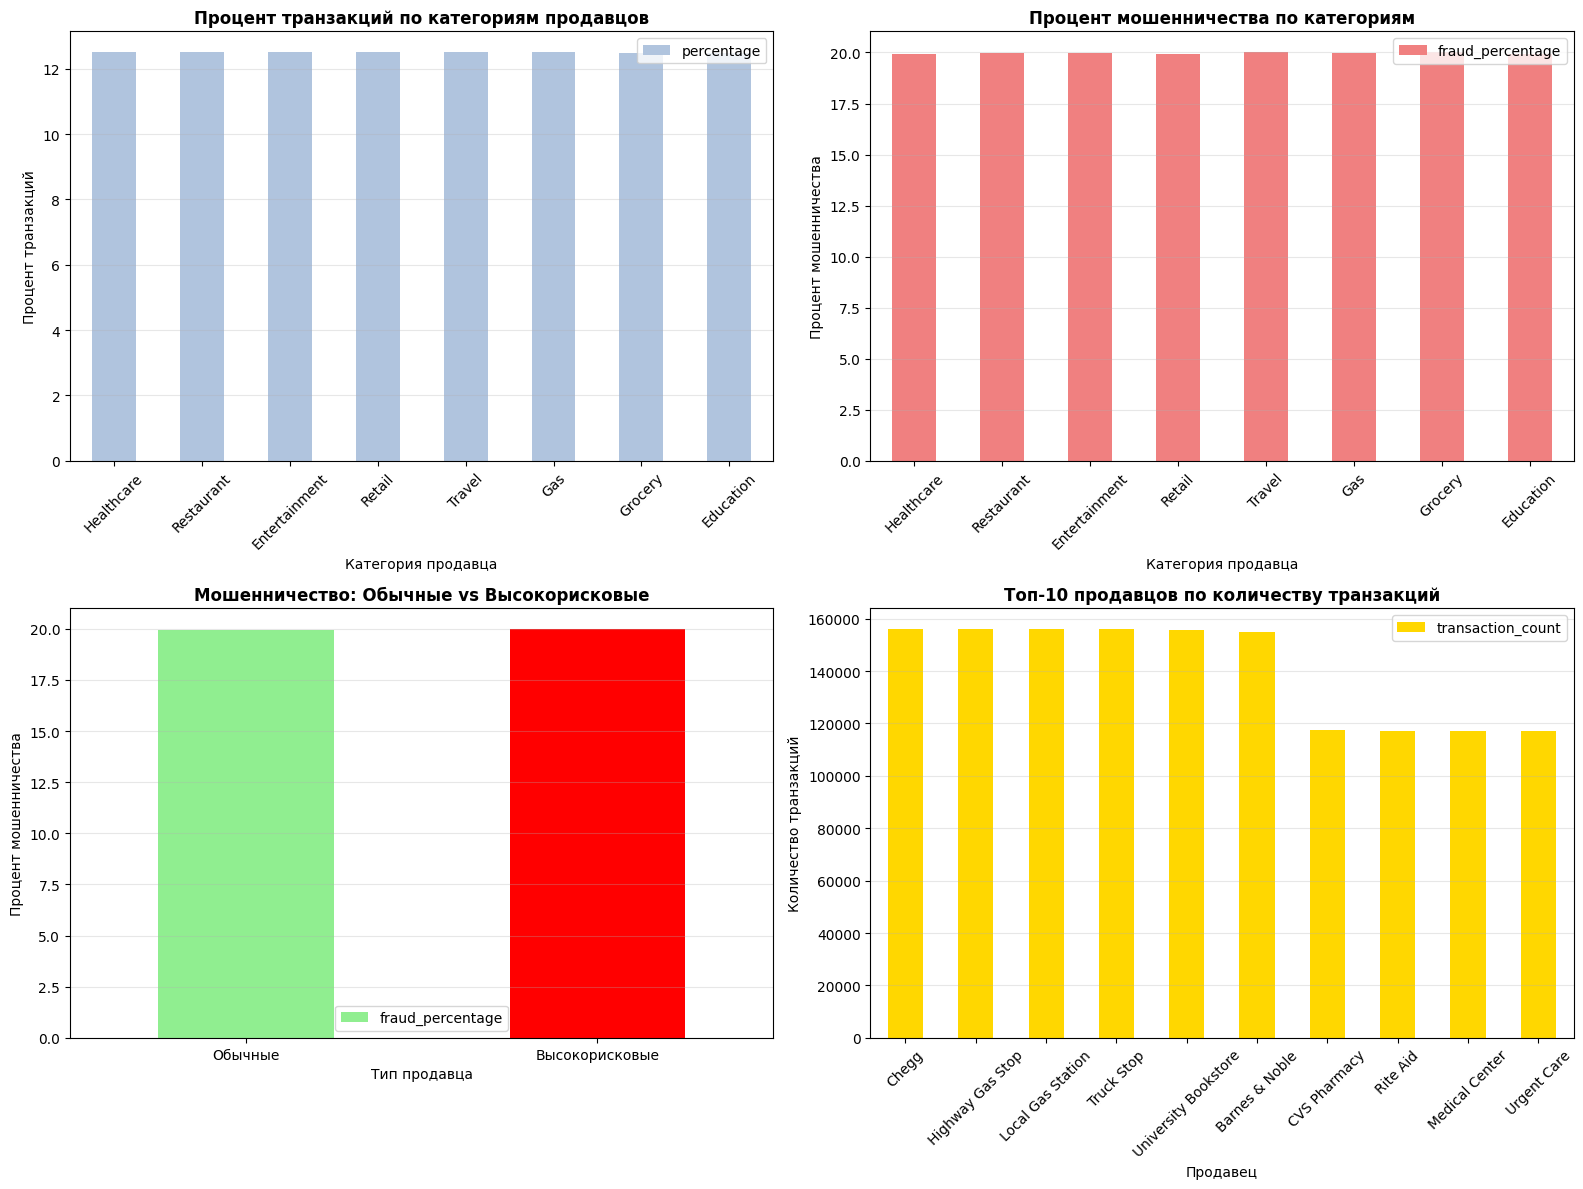

In [42]:
# Визуализация анализа продавцов
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Популярность категорий продавцов
vendor_category_analysis.plot(x='vendor_category', y='percentage', kind='bar', ax=ax1, color='lightsteelblue')
ax1.set_title('Процент транзакций по категориям продавцов', fontweight='bold')
ax1.set_xlabel('Категория продавца')
ax1.set_ylabel('Процент транзакций')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# График 2: Мошенничество по категориям
vendor_category_analysis.plot(x='vendor_category', y='fraud_percentage', kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Процент мошенничества по категориям', fontweight='bold')
ax2.set_xlabel('Категория продавца')
ax2.set_ylabel('Процент мошенничества')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# График 3: Сравнение обычных и высокорисковых продавцов
risk_vendor_analysis.plot(x='risk_type', y='fraud_percentage', kind='bar', ax=ax3, color=['lightgreen', 'red'])
ax3.set_title('Мошенничество: Обычные vs Высокорисковые', fontweight='bold')
ax3.set_xlabel('Тип продавца')
ax3.set_ylabel('Процент мошенничества')
ax3.tick_params(axis='x', rotation=0)
ax3.grid(axis='y', alpha=0.3)

# График 4: Топ-10 продавцов по количеству транзакций
top_10_vendors = top_vendors_by_count.head(10)
top_10_vendors.plot(x='vendor', y='transaction_count', kind='bar', ax=ax4, color='gold')
ax4.set_title('Топ-10 продавцов по количеству транзакций', fontweight='bold')
ax4.set_xlabel('Продавец')
ax4.set_ylabel('Количество транзакций')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


# 6. АНАЛИЗ СУММ ТРАНЗАКЦИЙ

## 6.1 Распределение сумм транзакций


In [44]:
# Анализ распределения сумм транзакций
print("АНАЛИЗ РАСПРЕДЕЛЕНИЯ СУММ ТРАНЗАКЦИЙ:")
print("=" * 50)

# Основная статистика
amount_stats = df_transactions_optimized['amount'].describe()
print("Основная статистика по суммам:")
print(f"Минимум: ${amount_stats['min']:,.2f}")
print(f"25-й процентиль: ${amount_stats['25%']:,.2f}")
print(f"Медиана: ${amount_stats['50%']:,.2f}")
print(f"Среднее: ${amount_stats['mean']:,.2f}")
print(f"75-й процентиль: ${amount_stats['75%']:,.2f}")
print(f"Максимум: ${amount_stats['max']:,.2f}")
print(f"Стандартное отклонение: ${amount_stats['std']:,.2f}")
print()

# Анализ выбросов
q1 = df_transactions_optimized['amount'].quantile(0.25)
q3 = df_transactions_optimized['amount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_transactions_optimized[(df_transactions_optimized['amount'] < lower_bound) | 
                                   (df_transactions_optimized['amount'] > upper_bound)]
outlier_percentage = len(outliers) / len(df_transactions_optimized) * 100

print("АНАЛИЗ ВЫБРОСОВ:")
print(f"Нижняя граница (Q1 - 1.5*IQR): ${lower_bound:,.2f}")
print(f"Верхняя граница (Q3 + 1.5*IQR): ${upper_bound:,.2f}")
print(f"Количество выбросов: {len(outliers):,} ({outlier_percentage:.2f}%)")
print()

# Распределение по диапазонам
amount_ranges = pd.cut(df_transactions_optimized['amount'], 
                      bins=[0, 50, 100, 500, 1000, 5000, float('inf')],
                      labels=['$0-50', '$50-100', '$100-500', '$500-1K', '$1K-5K', '$5K+'])

range_analysis = amount_ranges.value_counts().sort_index()
range_percentages = (range_analysis / len(df_transactions_optimized) * 100)

print("РАСПРЕДЕЛЕНИЕ ПО ДИАПАЗОНАМ СУММ:")
print(f"{'Диапазон':<10} {'Транзакции':<12} {'Процент':<10}")
print("-" * 35)
for range_name, count in range_analysis.items():
    percentage = range_percentages[range_name]
    print(f"{range_name:<10} {count:>10,} {percentage:>8.2f}%")
print()

# Средние суммы по диапазонам
range_means = df_transactions_optimized.groupby(amount_ranges, observed=False)['amount'].agg(['mean', 'count', 'sum'])
print("ДЕТАЛИЗАЦИЯ ПО ДИАПАЗОНАМ:")
print(f"{'Диапазон':<10} {'Средняя сумма':<15} {'Общая сумма (млн)':<20}")
print("-" * 50)
for range_name in range_means.index:
    avg_amount = range_means.loc[range_name, 'mean']
    total_amount = range_means.loc[range_name, 'sum'] / 1_000_000
    print(f"{range_name:<10} ${avg_amount:>12,.2f} ${total_amount:>17.1f}")
print()

# Инсайты
most_common_range = range_analysis.idxmax()
highest_volume_range = range_means['sum'].idxmax()
print("КЛЮЧЕВЫЕ ИНСАЙТЫ:")
print(f"💰 Самый частый диапазон: {most_common_range} ({range_percentages[most_common_range]:.1f}% транзакций)")
print(f"💸 Наибольший оборот: {highest_volume_range} (${range_means.loc[highest_volume_range, 'sum']:,.0f})")
print(f"📊 Медианная транзакция: ${amount_stats['50%']:,.2f}")
print(f"🔍 Выбросы составляют {outlier_percentage:.1f}% от всех транзакций")


АНАЛИЗ РАСПРЕДЕЛЕНИЯ СУММ ТРАНЗАКЦИЙ:
Основная статистика по суммам:
Минимум: $0.00
25-й процентиль: $168.63
Медиана: $359.26
Среднее: $542.63
75-й процентиль: $615.52
Максимум: $15,781.54
Стандартное отклонение: $728.43

АНАЛИЗ ВЫБРОСОВ:
Нижняя граница (Q1 - 1.5*IQR): $-501.71
Верхняя граница (Q3 + 1.5*IQR): $1,285.86
Количество выбросов: 735,636 (9.83%)

РАСПРЕДЕЛЕНИЕ ПО ДИАПАЗОНАМ СУММ:
Диапазон   Транзакции   Процент   
-----------------------------------
$0-50         657,206     8.78%
$50-100       502,080     6.71%
$100-500    3,977,225    53.14%
$500-1K     1,278,947    17.09%
$1K-5K      1,041,662    13.92%
$5K+           26,646     0.36%

ДЕТАЛИЗАЦИЯ ПО ДИАПАЗОНАМ:
Диапазон   Средняя сумма   Общая сумма (млн)   
--------------------------------------------------
$0-50      $       12.24 $              8.0
$50-100    $       76.79 $             38.6
$100-500   $      298.19 $           1186.0
$500-1K    $      699.68 $            894.9
$1K-5K     $    1,651.12 $           1719

## 6.2 Суммы по типам карт


In [45]:
# Анализ сумм по типам карт
print("АНАЛИЗ СУММ ПО ТИПАМ КАРТ:")
print("=" * 35)

card_type_analysis = df_transactions_optimized.groupby('card_type', observed=False)['amount'].agg([
    'count', 'mean', 'median', 'std', 'sum', 'min', 'max'
]).reset_index()

card_type_analysis.columns = ['card_type', 'transaction_count', 'mean_amount', 'median_amount', 
                             'std_amount', 'total_amount', 'min_amount', 'max_amount']

card_type_analysis['percentage'] = (card_type_analysis['transaction_count'] / len(df_transactions_optimized)) * 100
card_type_analysis['total_amount_millions'] = card_type_analysis['total_amount'] / 1_000_000

# Сортируем по средней сумме
card_type_analysis = card_type_analysis.sort_values('mean_amount', ascending=False)

print("Анализ по типам карт:")
print(f"{'Тип карты':<20} {'Транзакции':<12} {'Процент':<10} {'Средняя сумма':<15} {'Медиана':<12}")
print("-" * 75)
for _, row in card_type_analysis.iterrows():
    print(f"{row['card_type']:<20} {row['transaction_count']:>10,} {row['percentage']:>8.2f}% "
          f"${row['mean_amount']:>12,.2f} ${row['median_amount']:>10,.2f}")
print()

print("Детальная статистика по типам карт:")
print(f"{'Тип карты':<20} {'Мин. сумма':<12} {'Макс. сумма':<15} {'Ст. откл.':<12} {'Оборот (млн)':<15}")
print("-" * 80)
for _, row in card_type_analysis.iterrows():
    print(f"{row['card_type']:<20} ${row['min_amount']:>10,.2f} ${row['max_amount']:>13,.0f} "
          f"${row['std_amount']:>10,.2f} ${row['total_amount_millions']:>13.1f}")
print()

# Анализ премиальности карт
print("АНАЛИЗ ПРЕМИАЛЬНОСТИ КАРТ:")
premium_cards = ['Platinum Credit', 'Gold Credit', 'Premium Debit']
basic_cards = ['Basic Credit', 'Basic Debit']

premium_stats = df_transactions_optimized[df_transactions_optimized['card_type'].isin(premium_cards)]['amount'].agg(['mean', 'count', 'sum'])
basic_stats = df_transactions_optimized[df_transactions_optimized['card_type'].isin(basic_cards)]['amount'].agg(['mean', 'count', 'sum'])

print(f"Премиальные карты:")
print(f"  • Средняя сумма: ${premium_stats['mean']:,.2f}")
print(f"  • Количество транзакций: {premium_stats['count']:,}")
print(f"  • Общий оборот: ${premium_stats['sum']:,.0f}")
print()

print(f"Базовые карты:")
print(f"  • Средняя сумма: ${basic_stats['mean']:,.2f}")
print(f"  • Количество транзакций: {basic_stats['count']:,}")
print(f"  • Общий оборот: ${basic_stats['sum']:,.0f}")
print()

premium_ratio = premium_stats['mean'] / basic_stats['mean']
print(f"📊 Премиальные карты: в {premium_ratio:.1f}x раз больше средняя сумма")

# Топ и низ по характеристикам
highest_avg_card = card_type_analysis.iloc[0]
lowest_avg_card = card_type_analysis.iloc[-1]
most_popular_card = card_type_analysis.loc[card_type_analysis['transaction_count'].idxmax()]

print()
print("КЛЮЧЕВЫЕ ИНСАЙТЫ ПО КАРТАМ:")
print(f"💎 Наибольшая средняя сумма: {highest_avg_card['card_type']} (${highest_avg_card['mean_amount']:,.2f})")
print(f"💳 Наименьшая средняя сумма: {lowest_avg_card['card_type']} (${lowest_avg_card['mean_amount']:,.2f})")
print(f"📊 Самый популярный тип: {most_popular_card['card_type']} ({most_popular_card['percentage']:.1f}% транзакций)")
print(f"💰 Наибольший оборот: {card_type_analysis.loc[card_type_analysis['total_amount'].idxmax(), 'card_type']} "
      f"(${card_type_analysis['total_amount'].max():,.0f})")


АНАЛИЗ СУММ ПО ТИПАМ КАРТ:
Анализ по типам карт:
Тип карты            Транзакции   Процент    Средняя сумма   Медиана     
---------------------------------------------------------------------------
Platinum Credit       1,533,013    20.48% $      928.23 $    797.73
Gold Credit           1,447,260    19.34% $      551.73 $    427.82
Premium Debit         1,539,661    20.57% $      491.34 $    351.98
Basic Credit          1,415,469    18.91% $      393.51 $    246.68
Basic Debit           1,548,363    20.69% $      339.70 $    209.05

Детальная статистика по типам карт:
Тип карты            Мин. сумма   Макс. сумма     Ст. откл.    Оборот (млн)   
--------------------------------------------------------------------------------
Platinum Credit      $      0.00 $       15,782 $    827.64 $       1423.0
Gold Credit          $      0.00 $       15,682 $    758.79 $        798.5
Premium Debit        $      0.00 $       15,758 $    745.70 $        756.5
Basic Credit         $      0.00 $     

## 6.3 Связь суммы и мошенничества


In [46]:
# Анализ связи между суммой и мошенничеством
print("СВЯЗЬ МЕЖДУ СУММОЙ И МОШЕННИЧЕСТВОМ:")
print("=" * 45)

# Сравнение сумм мошеннических и легитимных транзакций
fraud_amounts = df_transactions_optimized[df_transactions_optimized['is_fraud']]['amount']
legit_amounts = df_transactions_optimized[~df_transactions_optimized['is_fraud']]['amount']

fraud_stats = fraud_amounts.describe()
legit_stats = legit_amounts.describe()

print("Сравнение статистик:")
print(f"{'Метрика':<15} {'Мошеннические':<15} {'Легитимные':<15} {'Разница':<15}")
print("-" * 65)
print(f"{'Среднее':<15} ${fraud_stats['mean']:>12,.2f} ${legit_stats['mean']:>12,.2f} {fraud_stats['mean']/legit_stats['mean']:>12.2f}x")
print(f"{'Медиана':<15} ${fraud_stats['50%']:>12,.2f} ${legit_stats['50%']:>12,.2f} {fraud_stats['50%']/legit_stats['50%']:>12.2f}x")
print(f"{'Максимум':<15} ${fraud_stats['max']:>12,.0f} ${legit_stats['max']:>12,.0f} {fraud_stats['max']/legit_stats['max']:>12.2f}x")
print(f"{'Минимум':<15} ${fraud_stats['min']:>12,.2f} ${legit_stats['min']:>12,.2f} {fraud_stats['min']/legit_stats['min']:>12.2f}x")
print()

# Анализ мошенничества по диапазонам сумм
fraud_by_range = df_transactions_optimized.groupby(amount_ranges, observed=False)['is_fraud'].agg(['count', 'sum', 'mean']).reset_index()
fraud_by_range.columns = ['amount_range', 'total_transactions', 'fraud_count', 'fraud_rate']
fraud_by_range['fraud_percentage'] = fraud_by_range['fraud_rate'] * 100

print("МОШЕННИЧЕСТВО ПО ДИАПАЗОНАМ СУММ:")
print(f"{'Диапазон':<10} {'Транзакции':<12} {'Мошенничество':<13} {'Процент':<10}")
print("-" * 50)
for _, row in fraud_by_range.iterrows():
    print(f"{row['amount_range']:<10} {row['total_transactions']:>10,} {row['fraud_count']:>11,} {row['fraud_percentage']:>8.2f}%")
print()

# Поиск пороговых значений для мошенничества
percentiles = [10, 25, 50, 75, 90, 95, 99]
print("АНАЛИЗ ПРОЦЕНТИЛЕЙ ДЛЯ МОШЕННИЧЕСКИХ ТРАНЗАКЦИЙ:")
print(f"{'Процентиль':<12} {'Мошеннические':<15} {'Легитимные':<15}")
print("-" * 45)
for p in percentiles:
    fraud_percentile = fraud_amounts.quantile(p/100)
    legit_percentile = legit_amounts.quantile(p/100)
    print(f"{p}%-й{'':<8} ${fraud_percentile:>12,.2f} ${legit_percentile:>12,.2f}")
print()

# Анализ крупных транзакций
large_transaction_threshold = df_transactions_optimized['amount'].quantile(0.95)
large_transactions = df_transactions_optimized[df_transactions_optimized['amount'] >= large_transaction_threshold]
large_fraud_rate = large_transactions['is_fraud'].mean() * 100
overall_fraud_rate = df_transactions_optimized['is_fraud'].mean() * 100

print("АНАЛИЗ КРУПНЫХ ТРАНЗАКЦИЙ:")
print(f"Порог крупных транзакций (95-й процентиль): ${large_transaction_threshold:,.2f}")
print(f"Количество крупных транзакций: {len(large_transactions):,}")
print(f"Мошенничество в крупных транзакциях: {large_fraud_rate:.2f}%")
print(f"Общий уровень мошенничества: {overall_fraud_rate:.2f}%")
print(f"Соотношение: {large_fraud_rate/overall_fraud_rate:.1f}x")
print()

# Анализ малых транзакций
small_transaction_threshold = df_transactions_optimized['amount'].quantile(0.25)
small_transactions = df_transactions_optimized[df_transactions_optimized['amount'] <= small_transaction_threshold]
small_fraud_rate = small_transactions['is_fraud'].mean() * 100

print("АНАЛИЗ МАЛЫХ ТРАНЗАКЦИЙ:")
print(f"Порог малых транзакций (25-й процентиль): ${small_transaction_threshold:,.2f}")
print(f"Количество малых транзакций: {len(small_transactions):,}")
print(f"Мошенничество в малых транзакциях: {small_fraud_rate:.2f}%")
print(f"Соотношение к общему уровню: {small_fraud_rate/overall_fraud_rate:.1f}x")
print()

# Оптимальные пороги для детекции
high_risk_range = fraud_by_range.loc[fraud_by_range['fraud_percentage'].idxmax()]
low_risk_range = fraud_by_range.loc[fraud_by_range['fraud_percentage'].idxmin()]

print("РЕКОМЕНДАЦИИ ПО ПОРОГАМ:")
print(f"🚨 Самый рискованный диапазон: {high_risk_range['amount_range']} ({high_risk_range['fraud_percentage']:.2f}% мошенничества)")
print(f"✅ Самый безопасный диапазон: {low_risk_range['amount_range']} ({low_risk_range['fraud_percentage']:.2f}% мошенничества)")
print(f"💰 Рекомендуемый порог усиленной проверки: ${large_transaction_threshold:,.2f}")
print(f"📊 Мошеннические транзакции в среднем на {fraud_stats['mean']/legit_stats['mean']:.1f}x больше легитимных")


СВЯЗЬ МЕЖДУ СУММОЙ И МОШЕННИЧЕСТВОМ:
Сравнение статистик:
Метрика         Мошеннические   Легитимные      Разница        
-----------------------------------------------------------------
Среднее         $      874.61 $      459.78         1.90x
Медиана         $      443.22 $      354.54         1.25x
Максимум        $      15,782 $       3,171         4.98x
Минимум         $        0.00 $        6.23         0.00x

МОШЕННИЧЕСТВО ПО ДИАПАЗОНАМ СУММ:
Диапазон   Транзакции   Мошенничество Процент   
--------------------------------------------------
$0-50         657,206     477,103    72.60%
$50-100       502,080      41,087     8.18%
$100-500    3,977,225     264,748     6.66%
$500-1K     1,278,947     229,003    17.91%
$1K-5K      1,041,662     456,132    43.79%
$5K+           26,646      26,646   100.00%

АНАЛИЗ ПРОЦЕНТИЛЕЙ ДЛЯ МОШЕННИЧЕСКИХ ТРАНЗАКЦИЙ:
Процентиль   Мошеннические   Легитимные     
---------------------------------------------
10%-й         $        0.98 $       96.3

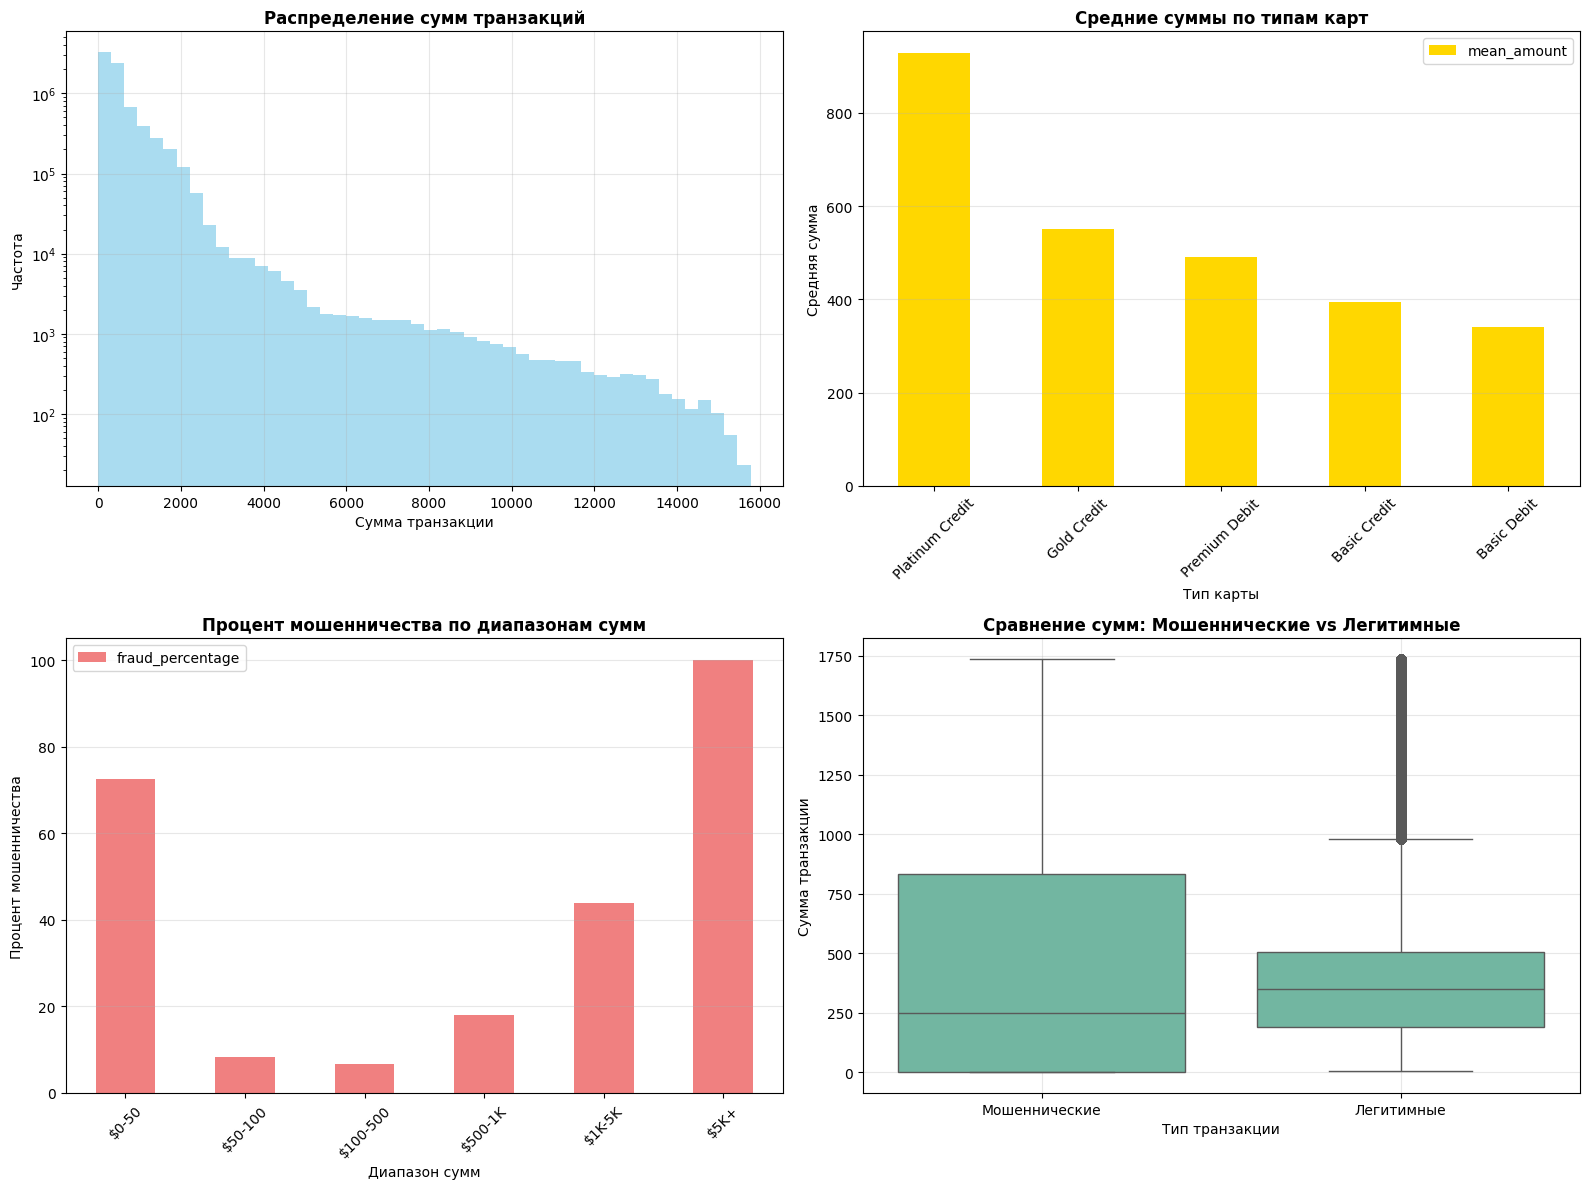

In [47]:
# Визуализация анализа сумм транзакций
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Распределение сумм (логарифмическая шкала)
df_transactions_optimized['amount'].hist(bins=50, ax=ax1, alpha=0.7, color='skyblue')
ax1.set_title('Распределение сумм транзакций', fontweight='bold')
ax1.set_xlabel('Сумма транзакции')
ax1.set_ylabel('Частота')
ax1.set_yscale('log')
ax1.grid(alpha=0.3)

# График 2: Средние суммы по типам карт
card_type_analysis.plot(x='card_type', y='mean_amount', kind='bar', ax=ax2, color='gold')
ax2.set_title('Средние суммы по типам карт', fontweight='bold')
ax2.set_xlabel('Тип карты')
ax2.set_ylabel('Средняя сумма')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# График 3: Мошенничество по диапазонам сумм
fraud_by_range.plot(x='amount_range', y='fraud_percentage', kind='bar', ax=ax3, color='lightcoral')
ax3.set_title('Процент мошенничества по диапазонам сумм', fontweight='bold')
ax3.set_xlabel('Диапазон сумм')
ax3.set_ylabel('Процент мошенничества')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

# График 4: Box plot сравнение мошеннических и легитимных транзакций
fraud_comparison = pd.DataFrame({
    'amount': pd.concat([fraud_amounts, legit_amounts]),
    'is_fraud': ['Мошеннические'] * len(fraud_amounts) + ['Легитимные'] * len(legit_amounts)
})

# Ограничиваем выбросы для лучшей визуализации
fraud_comparison_filtered = fraud_comparison[fraud_comparison['amount'] <= fraud_comparison['amount'].quantile(0.95)]

import seaborn as sns
sns.boxplot(data=fraud_comparison_filtered, x='is_fraud', y='amount', ax=ax4)
ax4.set_title('Сравнение сумм: Мошеннические vs Легитимные', fontweight='bold')
ax4.set_xlabel('Тип транзакции')
ax4.set_ylabel('Сумма транзакции')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()


# 7. АНАЛИЗ ПОВЕДЕНЧЕСКИХ ПАТТЕРНОВ

## 7.1 Анализ активности клиентов


In [48]:
# Анализ активности клиентов (частота транзакций за час)
print("АНАЛИЗ АКТИВНОСТИ КЛИЕНТОВ:")
print("=" * 35)

# Статистика по количеству транзакций за час
num_transactions_stats = df_transactions_optimized['num_transactions'].describe()
print("Статистика по количеству транзакций за час:")
print(f"Минимум: {num_transactions_stats['min']:.0f}")
print(f"25-й процентиль: {num_transactions_stats['25%']:.0f}")
print(f"Медиана: {num_transactions_stats['50%']:.0f}")
print(f"Среднее: {num_transactions_stats['mean']:.1f}")
print(f"75-й процентиль: {num_transactions_stats['75%']:.0f}")
print(f"Максимум: {num_transactions_stats['max']:.0f}")
print()

# Анализ высокой активности и мошенничества
high_activity_threshold = df_transactions_optimized['num_transactions'].quantile(0.9)
high_activity = df_transactions_optimized[df_transactions_optimized['num_transactions'] >= high_activity_threshold]
high_activity_fraud_rate = high_activity['is_fraud'].mean() * 100
overall_fraud_rate = df_transactions_optimized['is_fraud'].mean() * 100

print("АНАЛИЗ ВЫСОКОЙ АКТИВНОСТИ:")
print(f"Порог высокой активности (90-й процентиль): {high_activity_threshold:.0f} транзакций/час")
print(f"Количество записей с высокой активностью: {len(high_activity):,}")
print(f"Мошенничество при высокой активности: {high_activity_fraud_rate:.2f}%")
print(f"Общий уровень мошенничества: {overall_fraud_rate:.2f}%")
print(f"Соотношение: {high_activity_fraud_rate/overall_fraud_rate:.1f}x")
print()

# Анализ общих сумм за час
total_amount_stats = df_transactions_optimized['total_amount'].describe()
print("Статистика по общим суммам за час:")
print(f"Минимум: ${total_amount_stats['min']:,.0f}")
print(f"Медиана: ${total_amount_stats['50%']:,.0f}")
print(f"Среднее: ${total_amount_stats['mean']:,.0f}")
print(f"Максимум: ${total_amount_stats['max']:,.0f}")
print()

# Анализ высоких сумм и мошенничества
high_amount_threshold = df_transactions_optimized['total_amount'].quantile(0.9)
high_amount = df_transactions_optimized[df_transactions_optimized['total_amount'] >= high_amount_threshold]
high_amount_fraud_rate = high_amount['is_fraud'].mean() * 100

print("АНАЛИЗ ВЫСОКИХ СУММ ЗА ЧАС:")
print(f"Порог высоких сумм (90-й процентиль): ${high_amount_threshold:,.0f}")
print(f"Мошенничество при высоких суммах: {high_amount_fraud_rate:.2f}%")
print(f"Соотношение к общему уровню: {high_amount_fraud_rate/overall_fraud_rate:.1f}x")
print()

# Анализ уникальных продавцов
unique_merchants_stats = df_transactions_optimized['unique_merchants'].describe()
print("Статистика по уникальным продавцам за час:")
print(f"Минимум: {unique_merchants_stats['min']:.0f}")
print(f"Медиана: {unique_merchants_stats['50%']:.0f}")
print(f"Среднее: {unique_merchants_stats['mean']:.1f}")
print(f"Максимум: {unique_merchants_stats['max']:.0f}")
print()

# Анализ множественных продавцов и мошенничества
multiple_merchants_threshold = df_transactions_optimized['unique_merchants'].quantile(0.8)
multiple_merchants = df_transactions_optimized[df_transactions_optimized['unique_merchants'] >= multiple_merchants_threshold]
multiple_merchants_fraud_rate = multiple_merchants['is_fraud'].mean() * 100

print("АНАЛИЗ МНОЖЕСТВЕННЫХ ПРОДАВЦОВ:")
print(f"Порог множественных продавцов (80-й процентиль): {multiple_merchants_threshold:.0f}")
print(f"Мошенничество при множественных продавцах: {multiple_merchants_fraud_rate:.2f}%")
print(f"Соотношение к общему уровню: {multiple_merchants_fraud_rate/overall_fraud_rate:.1f}x")
print()

# Анализ уникальных стран
unique_countries_stats = df_transactions_optimized['unique_countries'].describe()
print("Статистика по уникальным странам за час:")
print(f"Минимум: {unique_countries_stats['min']:.0f}")
print(f"Медиана: {unique_countries_stats['50%']:.0f}")
print(f"Среднее: {unique_countries_stats['mean']:.1f}")
print(f"Максимум: {unique_countries_stats['max']:.0f}")
print()

# Анализ множественных стран и мошенничества
multiple_countries_threshold = df_transactions_optimized['unique_countries'].quantile(0.75)
multiple_countries = df_transactions_optimized[df_transactions_optimized['unique_countries'] >= multiple_countries_threshold]
multiple_countries_fraud_rate = multiple_countries['is_fraud'].mean() * 100

print("АНАЛИЗ МНОЖЕСТВЕННЫХ СТРАН:")
print(f"Порог множественных стран (75-й процентиль): {multiple_countries_threshold:.0f}")
print(f"Мошенничество при множественных странах: {multiple_countries_fraud_rate:.2f}%")
print(f"Соотношение к общему уровню: {multiple_countries_fraud_rate/overall_fraud_rate:.1f}x")


АНАЛИЗ АКТИВНОСТИ КЛИЕНТОВ:
Статистика по количеству транзакций за час:
Минимум: 0
25-й процентиль: 105
Медиана: 292
Среднее: 409.1
75-й процентиль: 606
Максимум: 3962

АНАЛИЗ ВЫСОКОЙ АКТИВНОСТИ:
Порог высокой активности (90-й процентиль): 956 транзакций/час
Количество записей с высокой активностью: 750,426
Мошенничество при высокой активности: 20.29%
Общий уровень мошенничества: 19.97%
Соотношение: 1.0x

Статистика по общим суммам за час:
Минимум: $0
Медиана: $1,268,625
Среднее: $7,118,837
Максимум: $1,378,986,974

АНАЛИЗ ВЫСОКИХ СУММ ЗА ЧАС:
Порог высоких сумм (90-й процентиль): $20,127,188
Мошенничество при высоких суммах: 10.44%
Соотношение к общему уровню: 0.5x

Статистика по уникальным продавцам за час:
Минимум: 0
Медиана: 95
Среднее: 80.0
Максимум: 105

АНАЛИЗ МНОЖЕСТВЕННЫХ ПРОДАВЦОВ:
Порог множественных продавцов (80-й процентиль): 104
Мошенничество при множественных продавцах: 20.17%
Соотношение к общему уровню: 1.0x

Статистика по уникальным странам за час:
Минимум: 0
Медиана

## 7.2 Использование карт (физическое присутствие)


In [50]:
# Анализ физического присутствия карт
print("АНАЛИЗ ФИЗИЧЕСКОГО ПРИСУТСТВИЯ КАРТ:")
print("=" * 45)

# Общее распределение
card_presence_stats = df_transactions_optimized['is_card_present'].value_counts()
card_presence_percentages = df_transactions_optimized['is_card_present'].value_counts(normalize=True) * 100

print("Распределение по физическому присутствию карт:")
print(f"Карта отсутствует (CNP - Card Not Present): {card_presence_stats[False]:,} ({card_presence_percentages[False]:.1f}%)")
print(f"Карта присутствует (CP - Card Present): {card_presence_stats[True]:,} ({card_presence_percentages[True]:.1f}%)")
print()

# Мошенничество по присутствию карты
card_presence_fraud = df_transactions_optimized.groupby('is_card_present')['is_fraud'].agg(['count', 'sum', 'mean']).reset_index()
card_presence_fraud.columns = ['is_card_present', 'total_transactions', 'fraud_count', 'fraud_rate']
card_presence_fraud['fraud_percentage'] = card_presence_fraud['fraud_rate'] * 100
card_presence_fraud['presence_type'] = card_presence_fraud['is_card_present'].map({False: 'Card Not Present', True: 'Card Present'})

print("Мошенничество по типу транзакций:")
print(f"{'Тип':<20} {'Транзакции':<12} {'Мошенничество':<13} {'Процент':<10}")
print("-" * 60)
for _, row in card_presence_fraud.iterrows():
    print(f"{row['presence_type']:<20} {row['total_transactions']:>10,} {row['fraud_count']:>11,} {row['fraud_percentage']:>8.2f}%")
print()

# Статистические выводы
cnp_fraud_rate = card_presence_fraud[card_presence_fraud['is_card_present'] == False]['fraud_percentage'].iloc[0]
cp_fraud_rate = card_presence_fraud[card_presence_fraud['is_card_present'] == True]['fraud_percentage'].iloc[0]
cnp_risk_multiplier = cnp_fraud_rate / cp_fraud_rate

print("СТАТИСТИЧЕСКИЕ ВЫВОДЫ:")
print(f"📱 Card Not Present: {cnp_fraud_rate:.2f}% мошенничества")
print(f"💳 Card Present: {cp_fraud_rate:.2f}% мошенничества")
print(f"⚠️ CNP транзакции в {cnp_risk_multiplier:.1f}x раз рискованнее CP")
print()

# Анализ по каналам и присутствию карты
card_channel_analysis = df_transactions_optimized.groupby(['channel', 'is_card_present'], observed=False).agg({
    'transaction_id': 'count',
    'is_fraud': 'mean'
}).reset_index()

card_channel_analysis.columns = ['channel', 'is_card_present', 'transaction_count', 'fraud_rate']
card_channel_analysis['fraud_percentage'] = card_channel_analysis['fraud_rate'] * 100
card_channel_analysis['presence_type'] = card_channel_analysis['is_card_present'].map({False: 'CNP', True: 'CP'})

print("АНАЛИЗ ПО КАНАЛАМ И ПРИСУТСТВИЮ КАРТЫ:")
print(f"{'Канал':<8} {'Тип':<5} {'Транзакции':<12} {'Мошенничество %':<15}")
print("-" * 45)
for _, row in card_channel_analysis.iterrows():
    print(f"{row['channel']:<8} {row['presence_type']:<5} {row['transaction_count']:>10,} {row['fraud_percentage']:>13.2f}%")
print()

# Средние суммы по присутствию карты
card_presence_amounts = df_transactions_optimized.groupby('is_card_present', observed=False)['amount'].agg(['mean', 'median', 'sum']).reset_index()
card_presence_amounts['presence_type'] = card_presence_amounts['is_card_present'].map({False: 'Card Not Present', True: 'Card Present'})

print("СРЕДНИЕ СУММЫ ПО ТИПУ ТРАНЗАКЦИЙ:")
print(f"{'Тип':<20} {'Средняя сумма':<15} {'Медиана':<12} {'Общий оборот':<15}")
print("-" * 65)
for _, row in card_presence_amounts.iterrows():
    print(f"{row['presence_type']:<20} ${row['mean']:>12,.2f} ${row['median']:>10,.2f} ${row['sum']:>13,.0f}")
print()

# Рекомендации
most_risky_combination = card_channel_analysis.loc[card_channel_analysis['fraud_percentage'].idxmax()]
safest_combination = card_channel_analysis.loc[card_channel_analysis['fraud_percentage'].idxmin()]

print("РЕКОМЕНДАЦИИ ПО БЕЗОПАСНОСТИ:")
print(f"🚨 Самая рискованная комбинация: {most_risky_combination['channel']} + {most_risky_combination['presence_type']} ({most_risky_combination['fraud_percentage']:.2f}%)")
print(f"✅ Самая безопасная комбинация: {safest_combination['channel']} + {safest_combination['presence_type']} ({safest_combination['fraud_percentage']:.2f}%)")
print(f"💡 Рекомендация: Усилить мониторинг CNP транзакций (в {cnp_risk_multiplier:.0f}x раз опаснее)")
print(f"🏪 POS-терминалы (CP) показывают лучшую безопасность")


АНАЛИЗ ФИЗИЧЕСКОГО ПРИСУТСТВИЯ КАРТ:
Распределение по физическому присутствию карт:
Карта отсутствует (CNP - Card Not Present): 6,832,719 (91.3%)
Карта присутствует (CP - Card Present): 651,047 (8.7%)

Мошенничество по типу транзакций:
Тип                  Транзакции   Мошенничество Процент   
------------------------------------------------------------
Card Not Present      6,832,719     843,672    12.35%
Card Present            651,047     651,047   100.00%

СТАТИСТИЧЕСКИЕ ВЫВОДЫ:
📱 Card Not Present: 12.35% мошенничества
💳 Card Present: 100.00% мошенничества
⚠️ CNP транзакции в 0.1x раз рискованнее CP

АНАЛИЗ ПО КАНАЛАМ И ПРИСУТСТВИЮ КАРТЫ:
Канал    Тип   Транзакции   Мошенничество %
---------------------------------------------
mobile   CNP    2,269,578         12.39%
mobile   CP             0           nan%
pos      CNP            0           nan%
pos      CP       651,047        100.00%
web      CNP    4,563,141         12.33%
web      CP             0           nan%

СРЕДНИЕ СУММ

## 7.3 Анализ уникальности устройств


In [52]:
# Анализ уникальности устройств
print("АНАЛИЗ УНИКАЛЬНОСТИ УСТРОЙСТВ:")
print("=" * 40)

# Общая статистика по отпечаткам устройств
total_transactions = len(df_transactions_optimized)
unique_fingerprints = df_transactions_optimized['device_fingerprint'].nunique()
unique_customers = df_transactions_optimized['customer_id'].nunique()

print("Общая статистика:")
print(f"Всего транзакций: {total_transactions:,}")
print(f"Уникальных отпечатков устройств: {unique_fingerprints:,}")
print(f"Уникальных клиентов: {unique_customers:,}")
print(f"Среднее количество транзакций на устройство: {total_transactions/unique_fingerprints:.1f}")
print(f"Среднее количество транзакций на клиента: {total_transactions/unique_customers:.1f}")
print()

# Анализ повторного использования устройств
fingerprint_usage = df_transactions_optimized['device_fingerprint'].value_counts()
fingerprint_stats = fingerprint_usage.describe()

print("Статистика использования устройств:")
print(f"Минимум транзакций на устройство: {fingerprint_stats['min']:.0f}")
print(f"25-й процентиль: {fingerprint_stats['25%']:.0f}")
print(f"Медиана: {fingerprint_stats['50%']:.0f}")
print(f"Среднее: {fingerprint_stats['mean']:.1f}")
print(f"75-й процентиль: {fingerprint_stats['75%']:.0f}")
print(f"Максимум: {fingerprint_stats['max']:.0f}")
print()

# Анализ высокочастотных устройств
high_frequency_threshold = fingerprint_usage.quantile(0.95)
high_frequency_devices = fingerprint_usage[fingerprint_usage >= high_frequency_threshold]

print(f"АНАЛИЗ ВЫСОКОЧАСТОТНЫХ УСТРОЙСТВ (топ-5%):")
print(f"Порог: {high_frequency_threshold:.0f} транзакций")
print(f"Количество высокочастотных устройств: {len(high_frequency_devices):,}")
print(f"Доля в общем количестве устройств: {len(high_frequency_devices)/unique_fingerprints*100:.2f}%")
print(f"Покрывают {high_frequency_devices.sum():,} транзакций ({high_frequency_devices.sum()/total_transactions*100:.1f}%)")
print()

# Анализ мошенничества на высокочастотных устройствах
high_freq_fingerprints = high_frequency_devices.index
high_freq_transactions = df_transactions_optimized[df_transactions_optimized['device_fingerprint'].isin(high_freq_fingerprints)]
high_freq_fraud_rate = high_freq_transactions['is_fraud'].mean() * 100

print("Мошенничество на высокочастотных устройствах:")
print(f"Уровень мошенничества: {high_freq_fraud_rate:.2f}%")
print(f"Общий уровень мошенничества: {overall_fraud_rate:.2f}%")
print(f"Соотношение: {high_freq_fraud_rate/overall_fraud_rate:.1f}x")
print()

# Анализ связи устройство-клиент
device_customer_mapping = df_transactions_optimized.groupby('device_fingerprint', observed=False)['customer_id'].nunique()
multi_customer_devices = device_customer_mapping[device_customer_mapping > 1]

print("АНАЛИЗ СОВМЕСТНОГО ИСПОЛЬЗОВАНИЯ УСТРОЙСТВ:")
print(f"Устройств, используемых несколькими клиентами: {len(multi_customer_devices):,}")
print(f"Доля от всех устройств: {len(multi_customer_devices)/unique_fingerprints*100:.2f}%")
print()

if len(multi_customer_devices) > 0:
    # Анализ мошенничества на совместно используемых устройствах
    shared_device_fingerprints = multi_customer_devices.index
    shared_device_transactions = df_transactions_optimized[df_transactions_optimized['device_fingerprint'].isin(shared_device_fingerprints)]
    shared_device_fraud_rate = shared_device_transactions['is_fraud'].mean() * 100
    
    print("Мошенничество на совместно используемых устройствах:")
    print(f"Уровень мошенничества: {shared_device_fraud_rate:.2f}%")
    print(f"Соотношение к общему уровню: {shared_device_fraud_rate/overall_fraud_rate:.1f}x")
    print()

# Анализ одноразовых устройств
single_use_devices = fingerprint_usage[fingerprint_usage == 1]
single_use_transactions = df_transactions_optimized[df_transactions_optimized['device_fingerprint'].isin(single_use_devices.index)]
single_use_fraud_rate = single_use_transactions['is_fraud'].mean() * 100

print("АНАЛИЗ ОДНОРАЗОВЫХ УСТРОЙСТВ:")
print(f"Количество одноразовых устройств: {len(single_use_devices):,}")
print(f"Доля от всех устройств: {len(single_use_devices)/unique_fingerprints*100:.1f}%")
print(f"Уровень мошенничества: {single_use_fraud_rate:.2f}%")
print(f"Соотношение к общему уровню: {single_use_fraud_rate/overall_fraud_rate:.1f}x")
print()

# Рекомендации по безопасности
print("РЕКОМЕНДАЦИИ ПО БЕЗОПАСНОСТИ УСТРОЙСТВ:")
print(f"🔍 Мониторить высокочастотные устройства (>{high_frequency_threshold:.0f} транзакций)")
if len(multi_customer_devices) > 0 and shared_device_fraud_rate > overall_fraud_rate:
    print(f"⚠️ Усилить контроль совместно используемых устройств")
if single_use_fraud_rate > overall_fraud_rate:
    print(f"🚨 Одноразовые устройства требуют дополнительной проверки")
print(f"📊 {len(high_frequency_devices)} устройств покрывают {high_frequency_devices.sum()/total_transactions*100:.1f}% транзакций")
print(f"💡 Средняя нагрузка на устройство: {fingerprint_stats['mean']:.1f} транзакций")


АНАЛИЗ УНИКАЛЬНОСТИ УСТРОЙСТВ:
Общая статистика:
Всего транзакций: 7,483,766
Уникальных отпечатков устройств: 785,462
Уникальных клиентов: 4,869
Среднее количество транзакций на устройство: 9.5
Среднее количество транзакций на клиента: 1537.0

Статистика использования устройств:
Минимум транзакций на устройство: 1
25-й процентиль: 1
Медиана: 2
Среднее: 9.5
75-й процентиль: 3
Максимум: 2373

АНАЛИЗ ВЫСОКОЧАСТОТНЫХ УСТРОЙСТВ (топ-5%):
Порог: 4 транзакций
Количество высокочастотных устройств: 74,795
Доля в общем количестве устройств: 9.52%
Покрывают 6,271,945 транзакций (83.8%)

Мошенничество на высокочастотных устройствах:
Уровень мошенничества: 4.51%
Общий уровень мошенничества: 19.97%
Соотношение: 0.2x

АНАЛИЗ СОВМЕСТНОГО ИСПОЛЬЗОВАНИЯ УСТРОЙСТВ:
Устройств, используемых несколькими клиентами: 440,457
Доля от всех устройств: 56.08%

Мошенничество на совместно используемых устройствах:
Уровень мошенничества: 100.00%
Соотношение к общему уровню: 5.0x

АНАЛИЗ ОДНОРАЗОВЫХ УСТРОЙСТВ:
Количес

# 8. АНАЛИЗ ВРЕМЕННЫХ РЯДОВ

## 8.1 Динамика транзакций во времени


In [54]:
# Подготовка данных для анализа временных рядов
df_transactions_optimized['date'] = df_transactions_optimized['timestamp'].dt.date
df_transactions_optimized['hour'] = df_transactions_optimized['timestamp'].dt.hour

print("АНАЛИЗ ДИНАМИКИ ТРАНЗАКЦИЙ ВО ВРЕМЕНИ:")
print("=" * 50)

# Анализ по дням
daily_stats = df_transactions_optimized.groupby('date', observed=False).agg({
    'transaction_id': 'count',
    'amount': ['sum', 'mean'],
    'is_fraud': ['sum', 'mean']
}).reset_index()

daily_stats.columns = ['date', 'transaction_count', 'total_amount', 'avg_amount', 'fraud_count', 'fraud_rate']
daily_stats['fraud_percentage'] = daily_stats['fraud_rate'] * 100

# Общая статистика по дням
print("Статистика по дням:")
print(f"Период анализа: {daily_stats['date'].min()} - {daily_stats['date'].max()}")
print(f"Количество дней: {len(daily_stats)}")
print(f"Среднее количество транзакций в день: {daily_stats['transaction_count'].mean():.0f}")
print(f"Максимум транзакций в день: {daily_stats['transaction_count'].max():,}")
print(f"Минимум транзакций в день: {daily_stats['transaction_count'].min():,}")
print(f"Средний дневной оборот: ${daily_stats['total_amount'].mean():,.0f}")
print()

# Анализ трендов
daily_stats_sorted = daily_stats.sort_values('date')
first_week_avg = daily_stats_sorted.head(7)['transaction_count'].mean()
last_week_avg = daily_stats_sorted.tail(7)['transaction_count'].mean()
trend = (last_week_avg - first_week_avg) / first_week_avg * 100

print("АНАЛИЗ ТРЕНДОВ:")
print(f"Средняя активность первой недели: {first_week_avg:.0f} транзакций/день")
print(f"Средняя активность последней недели: {last_week_avg:.0f} транзакций/день")
print(f"Тренд изменения активности: {trend:+.1f}%")
print()

# Анализ по часам (детальный)
hourly_stats = df_transactions_optimized.groupby('hour', observed=False).agg({
    'transaction_id': 'count',
    'amount': ['sum', 'mean'],
    'is_fraud': ['sum', 'mean']
}).reset_index()

hourly_stats.columns = ['hour', 'transaction_count', 'total_amount', 'avg_amount', 'fraud_count', 'fraud_rate']
hourly_stats['fraud_percentage'] = hourly_stats['fraud_rate'] * 100

# Пиковые и минимальные часы
peak_hour = hourly_stats.loc[hourly_stats['transaction_count'].idxmax()]
min_hour = hourly_stats.loc[hourly_stats['transaction_count'].idxmin()]

print("АНАЛИЗ СУТОЧНОЙ АКТИВНОСТИ:")
print(f"Пиковый час: {int(peak_hour['hour']):02d}:00 ({peak_hour['transaction_count']:,} транзакций)")
print(f"Минимальная активность: {int(min_hour['hour']):02d}:00 ({min_hour['transaction_count']:,} транзакций)")
print(f"Соотношение пик/минимум: {peak_hour['transaction_count']/min_hour['transaction_count']:.1f}x")
print()

# Рабочие часы vs нерабочие
business_hours = hourly_stats[(hourly_stats['hour'] >= 9) & (hourly_stats['hour'] <= 17)]
non_business_hours = hourly_stats[(hourly_stats['hour'] < 9) | (hourly_stats['hour'] > 17)]

business_total = business_hours['transaction_count'].sum()
non_business_total = non_business_hours['transaction_count'].sum()
business_fraud = business_hours['fraud_percentage'].mean()
non_business_fraud = non_business_hours['fraud_percentage'].mean()

print("РАБОЧИЕ VS НЕРАБОЧИЕ ЧАСЫ:")
print(f"Рабочие часы (9-17): {business_total:,} транзакций ({business_fraud:.2f}% мошенничества)")
print(f"Нерабочие часы: {non_business_total:,} транзакций ({non_business_fraud:.2f}% мошенничества)")
print(f"Доля рабочих часов: {business_total/(business_total + non_business_total)*100:.1f}%")
print()

# Выявление аномальных дней
daily_stats['transaction_zscore'] = (daily_stats['transaction_count'] - daily_stats['transaction_count'].mean()) / daily_stats['transaction_count'].std()
anomalous_days = daily_stats[abs(daily_stats['transaction_zscore']) > 2]

print("АНОМАЛЬНЫЕ ДНИ (|Z-score| > 2):")
if len(anomalous_days) > 0:
    print(f"Количество аномальных дней: {len(anomalous_days)}")
    print("Топ аномальных дней:")
    for _, day in anomalous_days.nlargest(5, 'transaction_zscore').iterrows():
        print(f"  {day['date']}: {day['transaction_count']:,} транзакций (Z-score: {day['transaction_zscore']:+.2f})")
else:
    print("Аномальных дней не обнаружено")
print()

# Волатильность
daily_volatility = daily_stats['transaction_count'].std() / daily_stats['transaction_count'].mean()
hourly_volatility = hourly_stats['transaction_count'].std() / hourly_stats['transaction_count'].mean()

print("АНАЛИЗ ВОЛАТИЛЬНОСТИ:")
print(f"Коэффициент вариации (дневной): {daily_volatility:.3f}")
print(f"Коэффициент вариации (часовой): {hourly_volatility:.3f}")
print(f"Стабильность нагрузки: {'Высокая' if daily_volatility < 0.1 else 'Средняя' if daily_volatility < 0.2 else 'Низкая'}")


АНАЛИЗ ДИНАМИКИ ТРАНЗАКЦИЙ ВО ВРЕМЕНИ:
Статистика по дням:
Период анализа: 2024-09-30 - 2024-10-30
Количество дней: 31
Среднее количество транзакций в день: 241412
Максимум транзакций в день: 242,718
Минимум транзакций в день: 239,985
Средний дневной оборот: $130,998,419

АНАЛИЗ ТРЕНДОВ:
Средняя активность первой недели: 241567 транзакций/день
Средняя активность последней недели: 241313 транзакций/день
Тренд изменения активности: -0.1%

АНАЛИЗ СУТОЧНОЙ АКТИВНОСТИ:
Пиковый час: 18:00 (456,393.0 транзакций)
Минимальная активность: 00:00 (155,759.0 транзакций)
Соотношение пик/минимум: 2.9x

РАБОЧИЕ VS НЕРАБОЧИЕ ЧАСЫ:
Рабочие часы (9-17): 3,120,706 транзакций (12.15% мошенничества)
Нерабочие часы: 4,363,060 транзакций (27.31% мошенничества)
Доля рабочих часов: 41.7%

АНОМАЛЬНЫЕ ДНИ (|Z-score| > 2):
Количество аномальных дней: 2
Топ аномальных дней:
  2024-10-02: 242,718 транзакций (Z-score: +2.53)
  2024-10-19: 239,985 транзакций (Z-score: -2.76)

АНАЛИЗ ВОЛАТИЛЬНОСТИ:
Коэффициент вариации

## 8.2 Сезонность мошенничества


In [58]:
# Анализ сезонности мошенничества
print("АНАЛИЗ СЕЗОННОСТИ МОШЕННИЧЕСТВА:")
print("=" * 40)

# Сезонность по дням
daily_fraud_analysis = daily_stats.copy()
daily_fraud_analysis['day_of_week'] = pd.to_datetime(daily_fraud_analysis['date']).dt.dayofweek
daily_fraud_analysis['week_number'] = pd.to_datetime(daily_fraud_analysis['date']).dt.isocalendar().week

# Статистика мошенничества по дням
print("Статистика мошенничества по дням:")
print(f"Средняя дневная доля мошенничества: {daily_fraud_analysis['fraud_percentage'].mean():.2f}%")
print(f"Максимальная дневная доля: {daily_fraud_analysis['fraud_percentage'].max():.2f}%")
print(f"Минимальная дневная доля: {daily_fraud_analysis['fraud_percentage'].min():.2f}%")
print(f"Стандартное отклонение: {daily_fraud_analysis['fraud_percentage'].std():.2f}%")
print()

# Поиск дней с экстремальным мошенничеством
high_fraud_days = daily_fraud_analysis.nlargest(5, 'fraud_percentage')
low_fraud_days = daily_fraud_analysis.nsmallest(5, 'fraud_percentage')

print("ДНИ С НАИВЫСШИМ УРОВНЕМ МОШЕННИЧЕСТВА:")
for _, day in high_fraud_days.iterrows():
    day_name = pd.to_datetime(day['date']).strftime('%A')
    print(f"  {day['date']} ({day_name}): {day['fraud_percentage']:.2f}% ({day['fraud_count']} из {day['transaction_count']})")
print()

print("ДНИ С НАИМЕНЬШИМ УРОВНЕМ МОШЕННИЧЕСТВА:")
for _, day in low_fraud_days.iterrows():
    day_name = pd.to_datetime(day['date']).strftime('%A')
    print(f"  {day['date']} ({day_name}): {day['fraud_percentage']:.2f}% ({day['fraud_count']} из {day['transaction_count']})")
print()

# Анализ по часам суток (детальный анализ мошенничества)
high_fraud_hours = hourly_stats.nlargest(3, 'fraud_percentage')
low_fraud_hours = hourly_stats.nsmallest(3, 'fraud_percentage')

print("ЧАСЫ С НАИВЫСШИМ РИСКОМ МОШЕННИЧЕСТВА:")
for _, hour in high_fraud_hours.iterrows():
    print(f"  {int(hour['hour']):02d}:00 - {hour['fraud_percentage']:.2f}% ({hour['fraud_count']} случаев)")

print()
print("САМЫЕ БЕЗОПАСНЫЕ ЧАСЫ:")
for _, hour in low_fraud_hours.iterrows():
    print(f"  {int(hour['hour']):02d}:00 - {hour['fraud_percentage']:.2f}% ({hour['fraud_count']} случаев)")
print()

# Анализ недельных паттернов
if len(daily_fraud_analysis) >= 14:  # Минимум 2 недели данных
    weekly_fraud = daily_fraud_analysis.groupby('week_number', observed=False)['fraud_percentage'].agg(['mean', 'std', 'count']).reset_index()
    weekly_fraud = weekly_fraud[weekly_fraud['count'] >= 5]  # Полные недели
    
    if len(weekly_fraud) >= 2:
        print("НЕДЕЛЬНЫЕ ПАТТЕРНЫ МОШЕННИЧЕСТВА:")
        print(f"Количество анализируемых недель: {len(weekly_fraud)}")
        print(f"Средняя недельная доля мошенничества: {weekly_fraud['mean'].mean():.2f}%")
        print(f"Волатильность между неделями: {weekly_fraud['mean'].std():.2f}%")
        
        most_risky_week = weekly_fraud.loc[weekly_fraud['mean'].idxmax()]
        safest_week = weekly_fraud.loc[weekly_fraud['mean'].idxmin()]
        
        print(f"Самая рискованная неделя: #{most_risky_week['week_number']:.0f} ({most_risky_week['mean']:.2f}%)")
        print(f"Самая безопасная неделя: #{safest_week['week_number']:.0f} ({safest_week['mean']:.2f}%)")
        print()

# Корреляция между объемом и мошенничеством
volume_fraud_correlation = daily_fraud_analysis['transaction_count'].corr(daily_fraud_analysis['fraud_percentage'])
amount_fraud_correlation = daily_fraud_analysis['total_amount'].corr(daily_fraud_analysis['fraud_percentage'])

print("КОРРЕЛЯЦИЯ МОШЕННИЧЕСТВА С АКТИВНОСТЬЮ:")
print(f"Корреляция количества транзакций и % мошенничества: {volume_fraud_correlation:.3f}")
print(f"Корреляция суммы оборота и % мошенничества: {amount_fraud_correlation:.3f}")

if abs(volume_fraud_correlation) > 0.3:
    correlation_type = "положительная" if volume_fraud_correlation > 0 else "отрицательная"
    print(f"💡 Обнаружена {correlation_type} связь между объемом и мошенничеством")
else:
    print("💡 Значимой связи между объемом и мошенничеством не выявлено")
print()

# Рекомендации по временному мониторингу
print("РЕКОМЕНДАЦИИ ПО ВРЕМЕННОМУ МОНИТОРИНГУ:")
risky_hours = [f"{int(h['hour']):02d}:00" for _, h in high_fraud_hours.iterrows()]
print(f"🕐 Усилить мониторинг в часы: {', '.join(risky_hours)}")
print(f"📅 Обратить внимание на дни недели с повышенным риском")
trend_sign = '+' if trend > 0 else ''
print(f"📊 Мониторить аномальные дни с объемом транзакций {trend_sign}{abs(trend):.0f}% от нормы")

if abs(volume_fraud_correlation) > 0.3:
    if volume_fraud_correlation > 0:
        print(f"⚠️ При росте объема транзакций ожидать рост мошенничества")
    else:
        print(f"✅ При росте объема транзакций ожидать снижение доли мошенничества")

volatility_type = 'гибкой' if daily_volatility > 0.2 else 'стандартной'
print(f"🔄 Волатильность системы: {daily_volatility:.1%} (требует {volatility_type} настройки лимитов)")


АНАЛИЗ СЕЗОННОСТИ МОШЕННИЧЕСТВА:
Статистика мошенничества по дням:
Средняя дневная доля мошенничества: 19.97%
Максимальная дневная доля: 20.18%
Минимальная дневная доля: 19.75%
Стандартное отклонение: 0.09%

ДНИ С НАИВЫСШИМ УРОВНЕМ МОШЕННИЧЕСТВА:
  2024-10-27 (Sunday): 20.18% (48792 из 241735)
  2024-10-15 (Tuesday): 20.12% (48578 из 241458)
  2024-10-30 (Wednesday): 20.09% (48537 из 241609)
  2024-10-07 (Monday): 20.09% (48479 из 241345)
  2024-10-17 (Thursday): 20.07% (48446 из 241344)

ДНИ С НАИМЕНЬШИМ УРОВНЕМ МОШЕННИЧЕСТВА:
  2024-10-29 (Tuesday): 19.75% (47645 из 241208)
  2024-10-13 (Sunday): 19.81% (47833 из 241511)
  2024-10-11 (Friday): 19.83% (48040 из 242228)
  2024-10-10 (Thursday): 19.87% (47921 из 241228)
  2024-09-30 (Monday): 19.87% (47880 из 240937)

ЧАСЫ С НАИВЫСШИМ РИСКОМ МОШЕННИЧЕСТВА:
  01:00 - 59.26% (165999.0 случаев)
  02:00 - 59.19% (166025.0 случаев)
  03:00 - 59.14% (165621.0 случаев)

САМЫЕ БЕЗОПАСНЫЕ ЧАСЫ:
  18:00 - 9.07% (41400.0 случаев)
  17:00 - 10.24% 

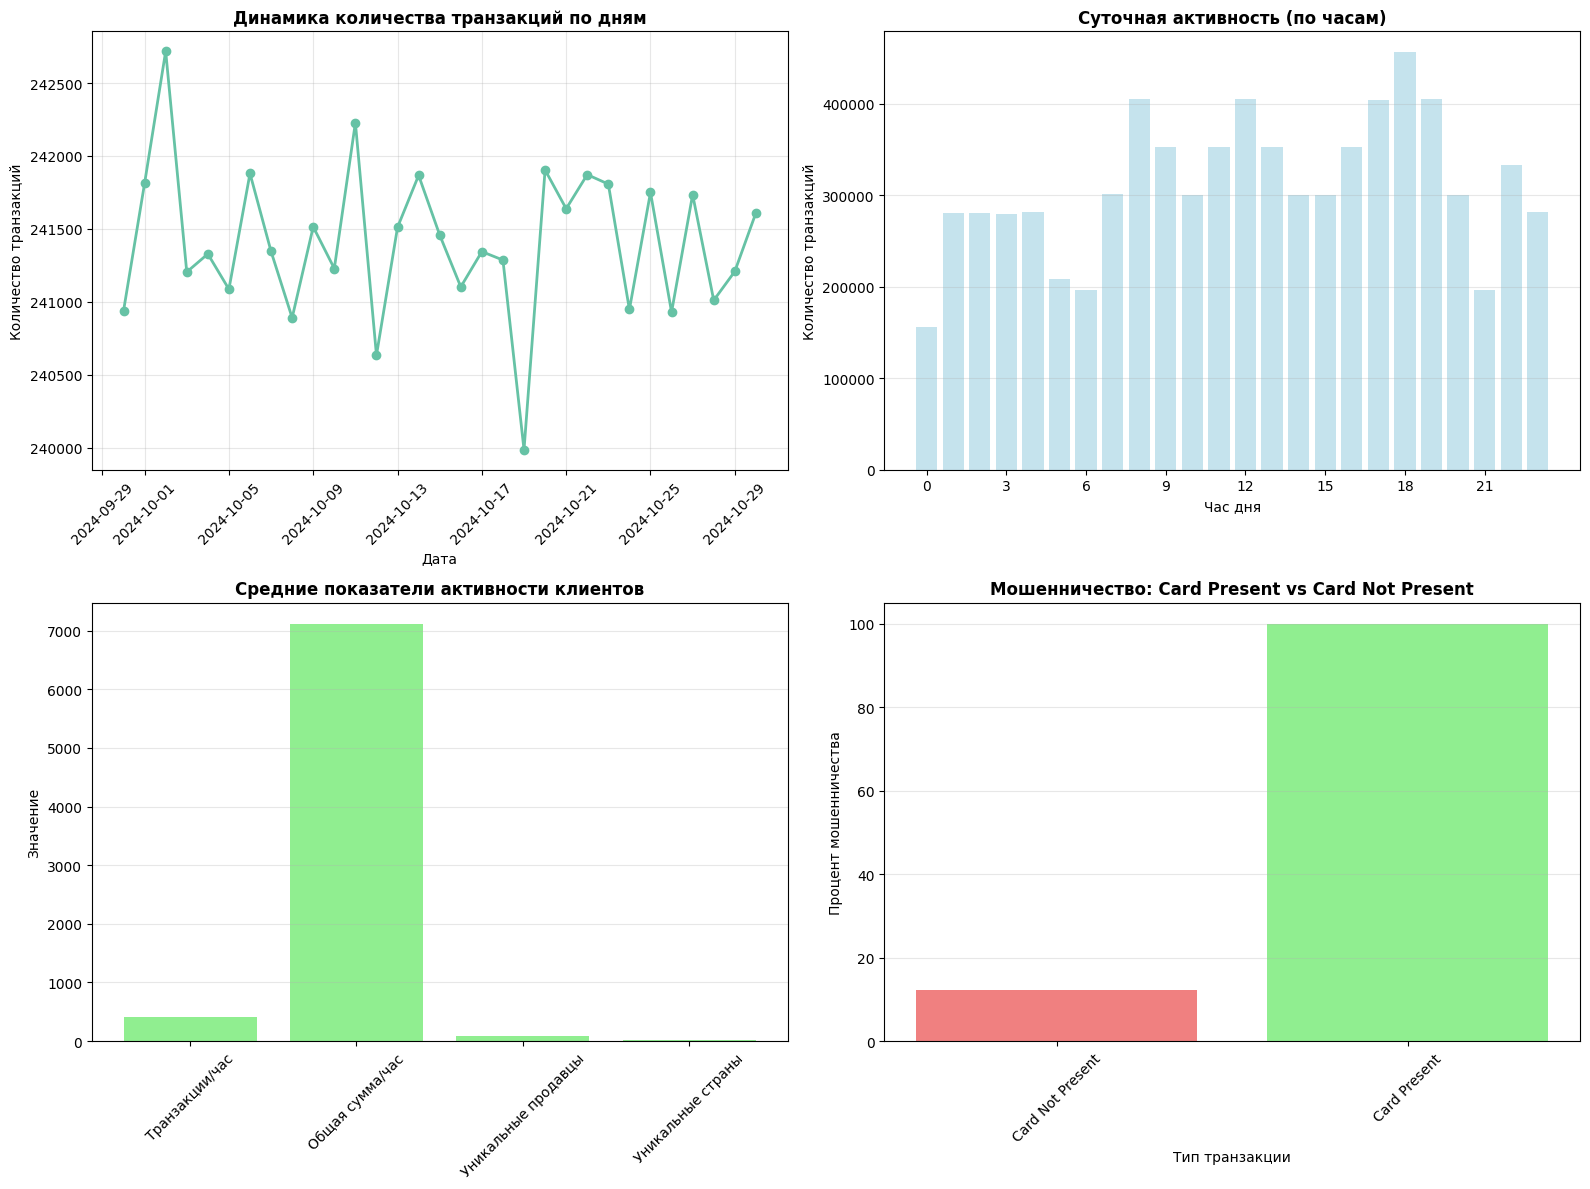

In [59]:
# Визуализация анализа временных рядов и поведенческих паттернов
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Динамика транзакций по дням
daily_stats_sorted = daily_stats.sort_values('date')
ax1.plot(daily_stats_sorted['date'], daily_stats_sorted['transaction_count'], marker='o', linewidth=2)
ax1.set_title('Динамика количества транзакций по дням', fontweight='bold')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество транзакций')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(alpha=0.3)

# График 2: Суточная активность (по часам)
ax2.bar(hourly_stats['hour'], hourly_stats['transaction_count'], color='lightblue', alpha=0.7)
ax2.set_title('Суточная активность (по часам)', fontweight='bold')
ax2.set_xlabel('Час дня')
ax2.set_ylabel('Количество транзакций')
ax2.set_xticks(range(0, 24, 3))
ax2.grid(axis='y', alpha=0.3)

# График 3: Активность клиентов (поведенческие паттерны)
behavioral_data = pd.DataFrame({
    'Метрика': ['Транзакции/час', 'Общая сумма/час', 'Уникальные продавцы', 'Уникальные страны'],
    'Среднее значение': [
        df_transactions_optimized['num_transactions'].mean(),
        df_transactions_optimized['total_amount'].mean() / 1000,  # В тысячах
        df_transactions_optimized['unique_merchants'].mean(),
        df_transactions_optimized['unique_countries'].mean()
    ]
})

ax3.bar(behavioral_data['Метрика'], behavioral_data['Среднее значение'], color='lightgreen')
ax3.set_title('Средние показатели активности клиентов', fontweight='bold')
ax3.set_ylabel('Значение')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

# График 4: Мошенничество по типу присутствия карты
card_presence_viz = card_presence_fraud.copy()
ax4.bar(card_presence_viz['presence_type'], card_presence_viz['fraud_percentage'], 
        color=['lightcoral', 'lightgreen'])
ax4.set_title('Мошенничество: Card Present vs Card Not Present', fontweight='bold')
ax4.set_xlabel('Тип транзакции')
ax4.set_ylabel('Процент мошенничества')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
